# EDA for Columns V and ID
The V columns appear to be redundant and correlated. Therefore for each block of V columns with similar NAN structure, we could find subsets within the block that are correlated (r > 0.75). Then we can replace the entire block with one column from each subset. 

For example in block `V1-V11`, we see that the subsets `[[1],[2,3],[4,5],[6,7],[8,9],[10,11]]` exist and we can choose `[1, 3, 4, 6, 8, 11]` to represent the `V1-V11` block without losing that much information. Alternatively you could apply PCA on each block, but this subset reduce method performed better.


reference https://www.kaggle.com/alijs1/ieee-transaction-columns-reference

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np,gc # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [71]:
cols_t = ['TransactionID', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9']
cols_v = ['V'+str(x) for x in range(1,340)]; types_v = {}
for c in cols_v: types_v[c] = 'float32'
train = pd.read_csv('train_transaction.csv',usecols=cols_t+['isFraud']+cols_v,dtype=types_v)

# NAN search
We will search all the columns of `train_transaction.csv` to determine which columns are related by the number of NANs present. We see that D1 relates to a subset of V281 thru V315, and D11 relates to V1 thru V11. Also we find groups of Vs with similar NAN structure. And we see that M1, M2, M3 related and M8, M9 related.

In [72]:
nans_df = train.isna()
nans_groups={}
i_cols = ['V'+str(i) for i in range(1,340)]
for col in train.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
del nans_df; x=gc.collect()

for k,v in nans_groups.items():
    print('####### NAN count =',k)
    print(v)

####### NAN count = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
####### NAN count = 8933
['card2']
####### NAN count = 1565
['card3']
####### NAN count = 1577
['card4']
####### NAN count = 4259
['card5']
####### NAN count = 1571
['card6']
####### NAN count = 65706
['addr1', 'addr2']
####### NAN count = 352271
['dist1']
####### NAN count = 552913
['dist2']
####### NAN count = 94456
['P_emaildomain']
####### NAN count = 453249
['R_emaildomain']
####### NAN count = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
####### NAN count = 280797
['D2']
####### NAN count = 262878
['D3']
####### NAN count = 168922
['D4']
####### NAN count = 309841
['D5']
####### NAN count = 517353
['D6']
####### NAN count = 551623
['D7']
####### NAN count = 515614
['D8', 'D9']
####### NAN count = 76022
['D10']
####### NAN count = 27

# V1-V11, D11

In [73]:
Vc = ['dayr','isFraud','TransactionAmt','card1','addr1','D1n','D11n']
Vs = nans_groups[279287]
Vtitle = 'V1 - V11, D11'

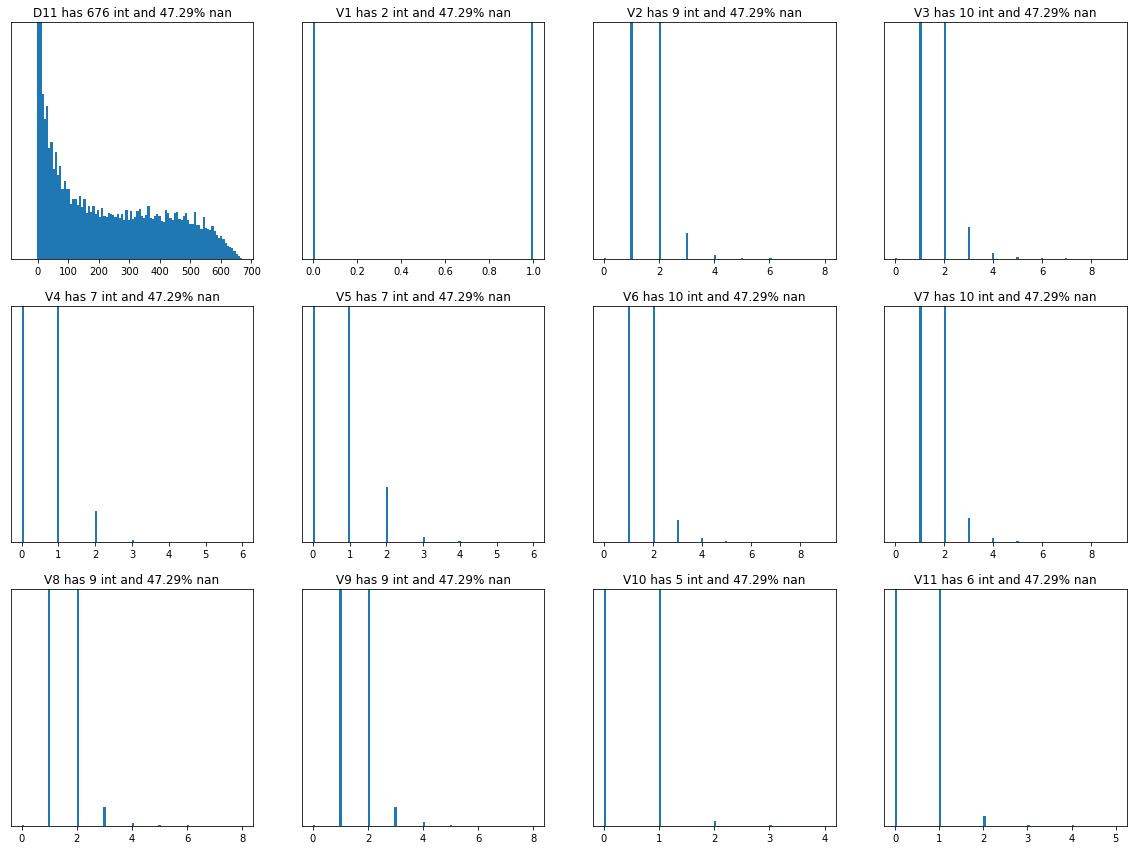

In [74]:
def make_plots(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    idx = train[~train[Vs[0]].isna()].index
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        n = train[v].nunique()
        x = np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train[v].isna())/len(train),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots(Vs)

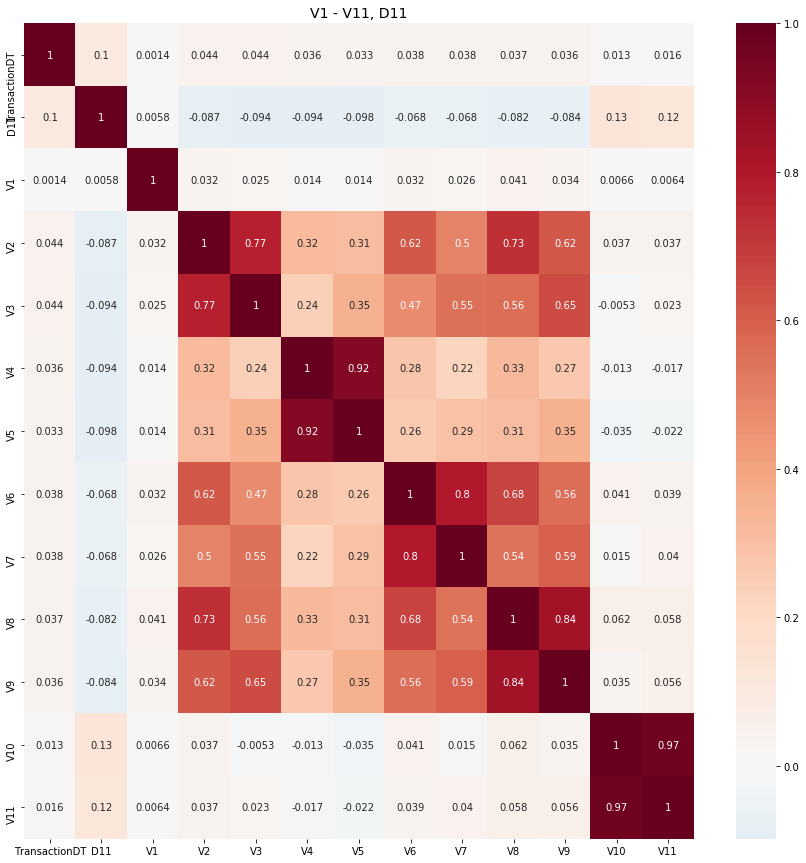

In [75]:
def make_corr(Vs,Vtitle=''):
    cols = ['TransactionDT'] + Vs
    plt.figure(figsize=(15,15))
    sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
    if Vtitle!='': plt.title(Vtitle,fontsize=14)
    else: plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
    plt.show()
make_corr(Vs,Vtitle)

In [76]:
grps = [[1],[2,3],[4,5],[6,7],[8,9],[10,11]]
def reduce_group(grps,c='V'):
    use = []
    for g in grps:
        mx = 0; vx = g[0]
        for gg in g:
            n = train[c+str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
            #print(str(gg)+'-'+str(n),', ',end='')
        use.append(vx)
        #print()
    print('Use these',use)
reduce_group(grps)

Use these [1, 3, 4, 6, 8, 11]


# V12 - V34

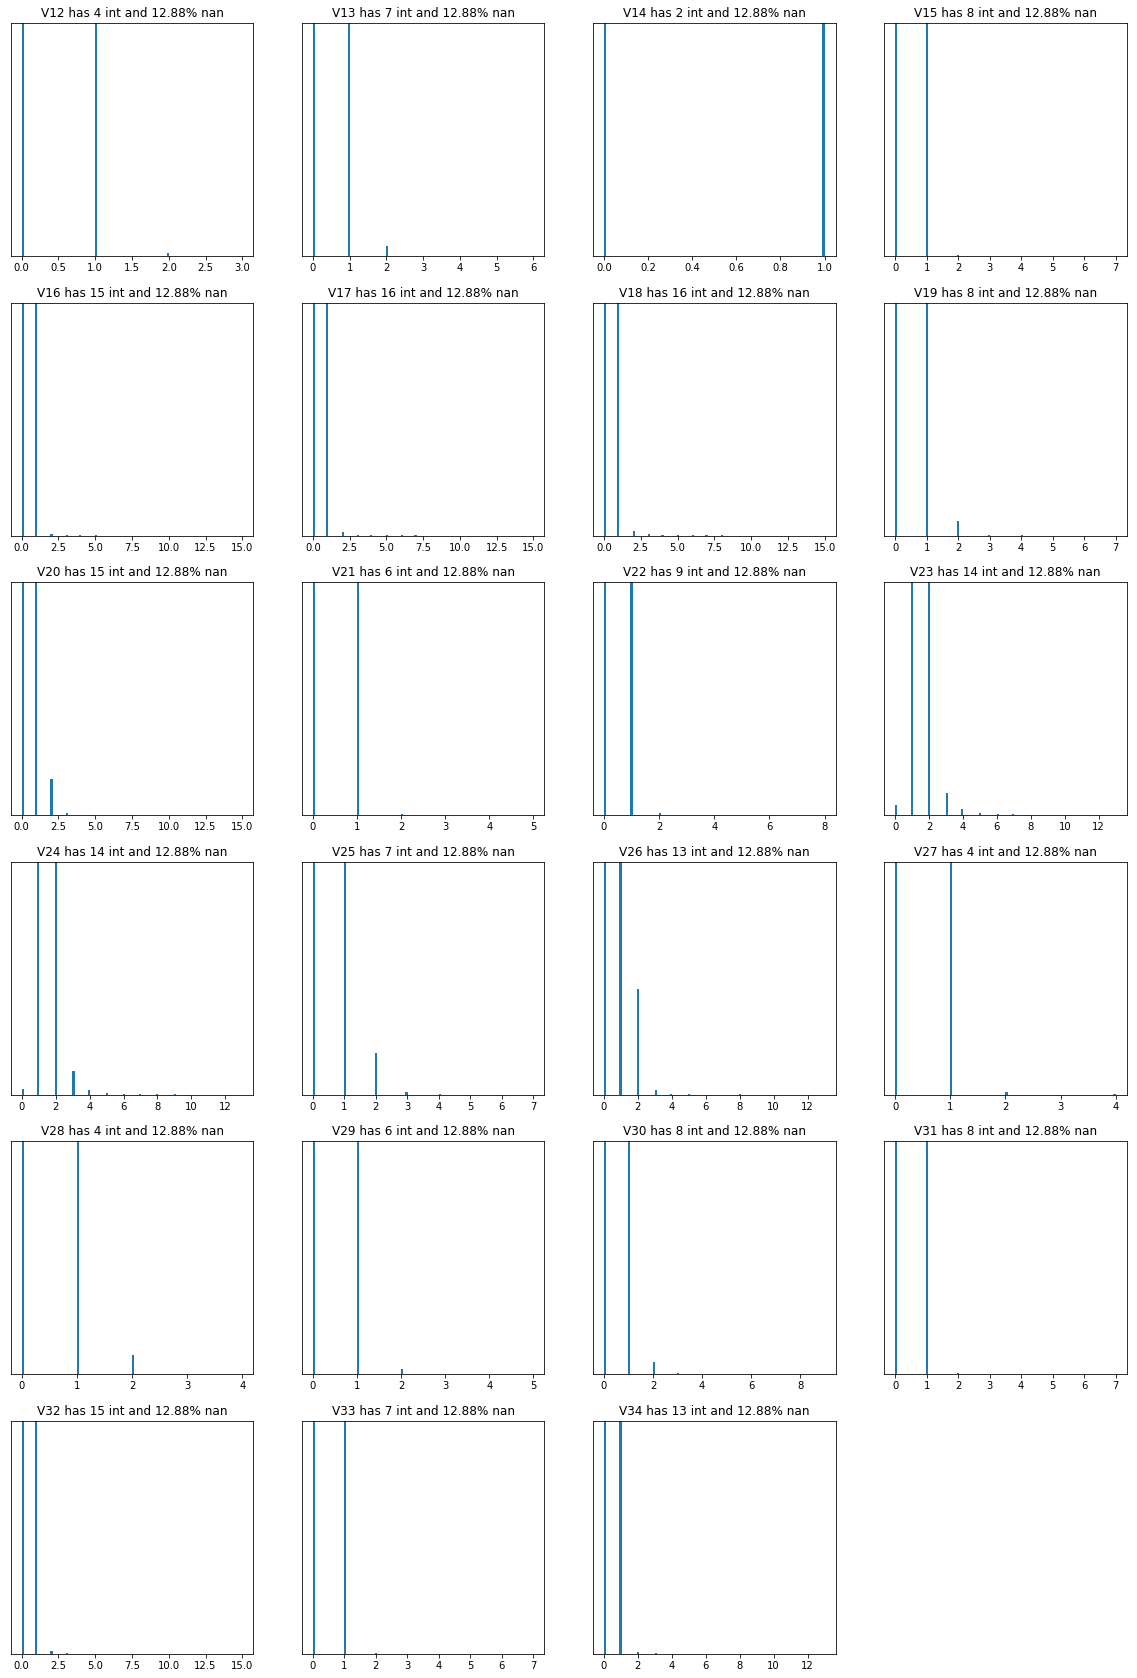

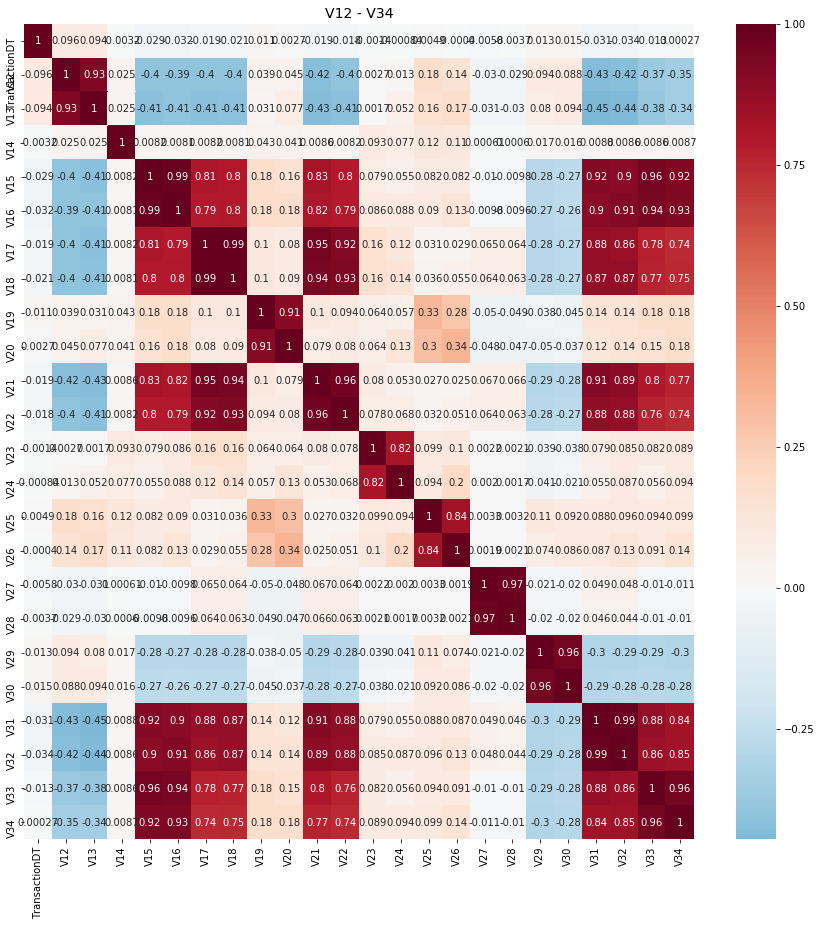

In [77]:
Vs = nans_groups[76073]
make_plots(Vs)
make_corr(Vs)

In [78]:
grps = [[12,13],[14],[15,16,17,18,21,22,31,32,33,34],[19,20],[23,24],[25,26],[27,28],[29,30]]
reduce_group(grps)

Use these [13, 14, 17, 20, 23, 26, 27, 30]


# V35 - V52

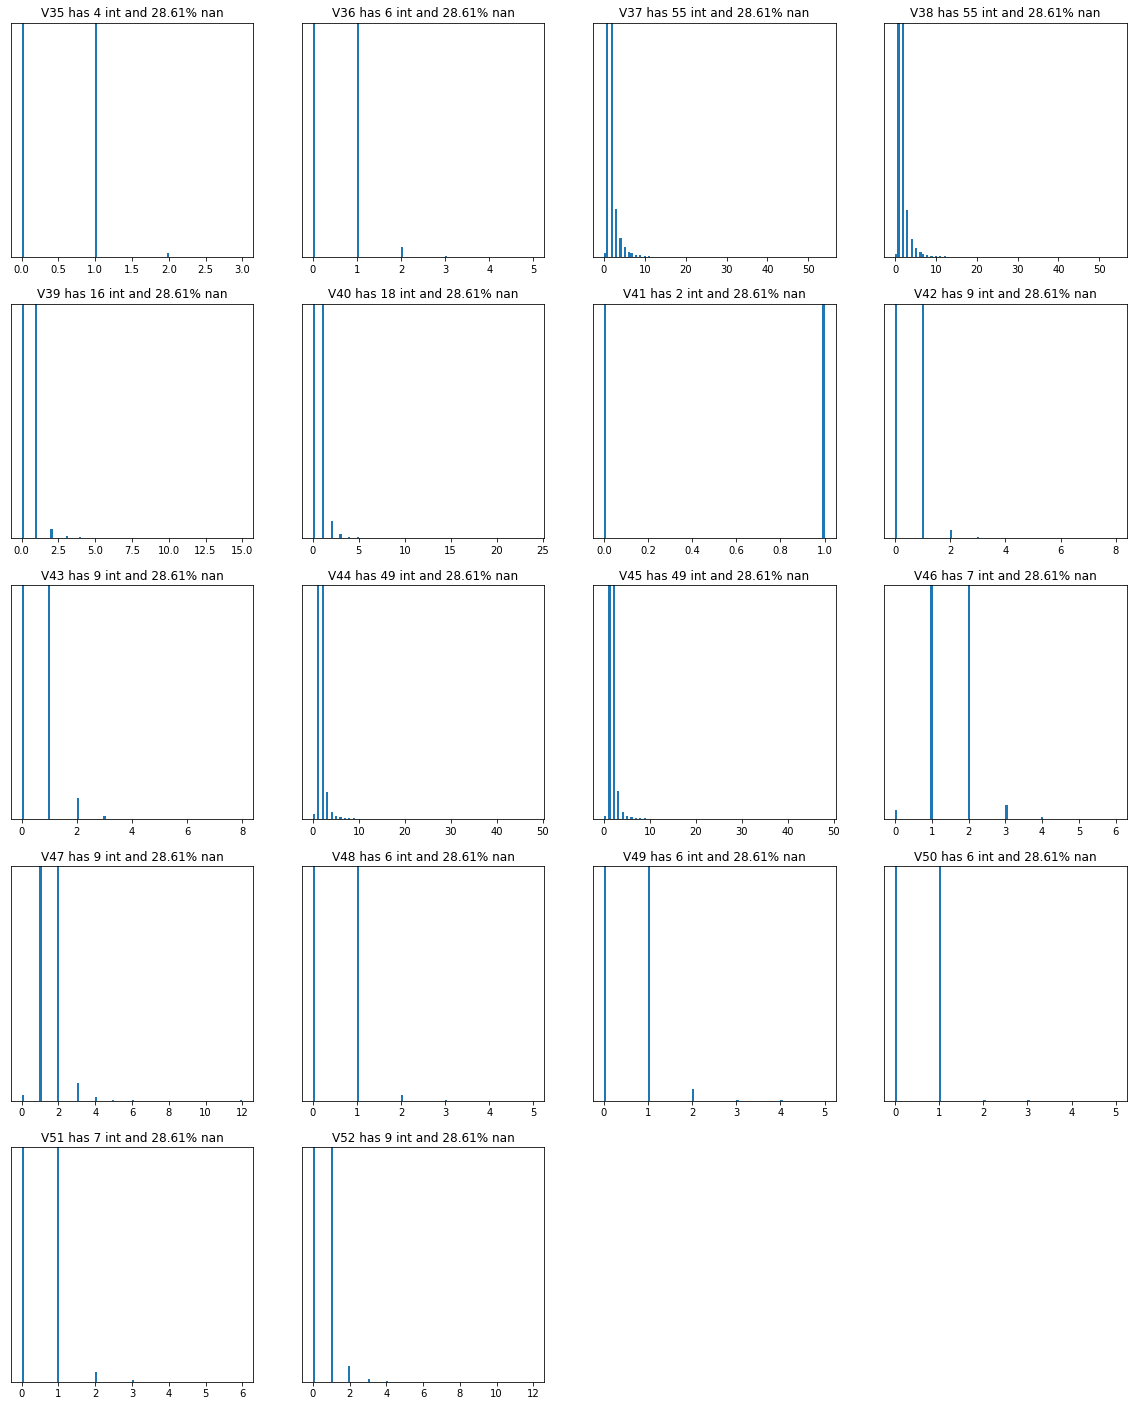

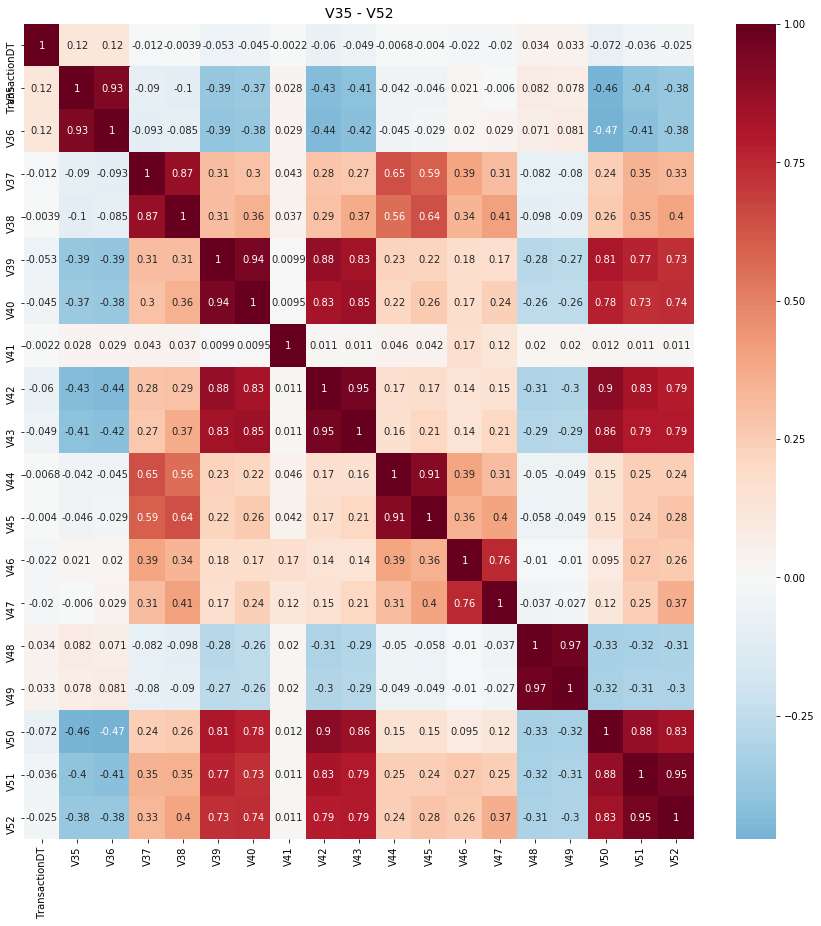

In [79]:
Vs = nans_groups[168969]
make_plots(Vs)
make_corr(Vs)

In [80]:
grps = [[35,36],[37,38],[39,40,42,43,50,51,52],[41],[44,45],[46,47],[48,49]]
reduce_group(grps)

Use these [36, 37, 40, 41, 44, 47, 48]


# V53 - V74

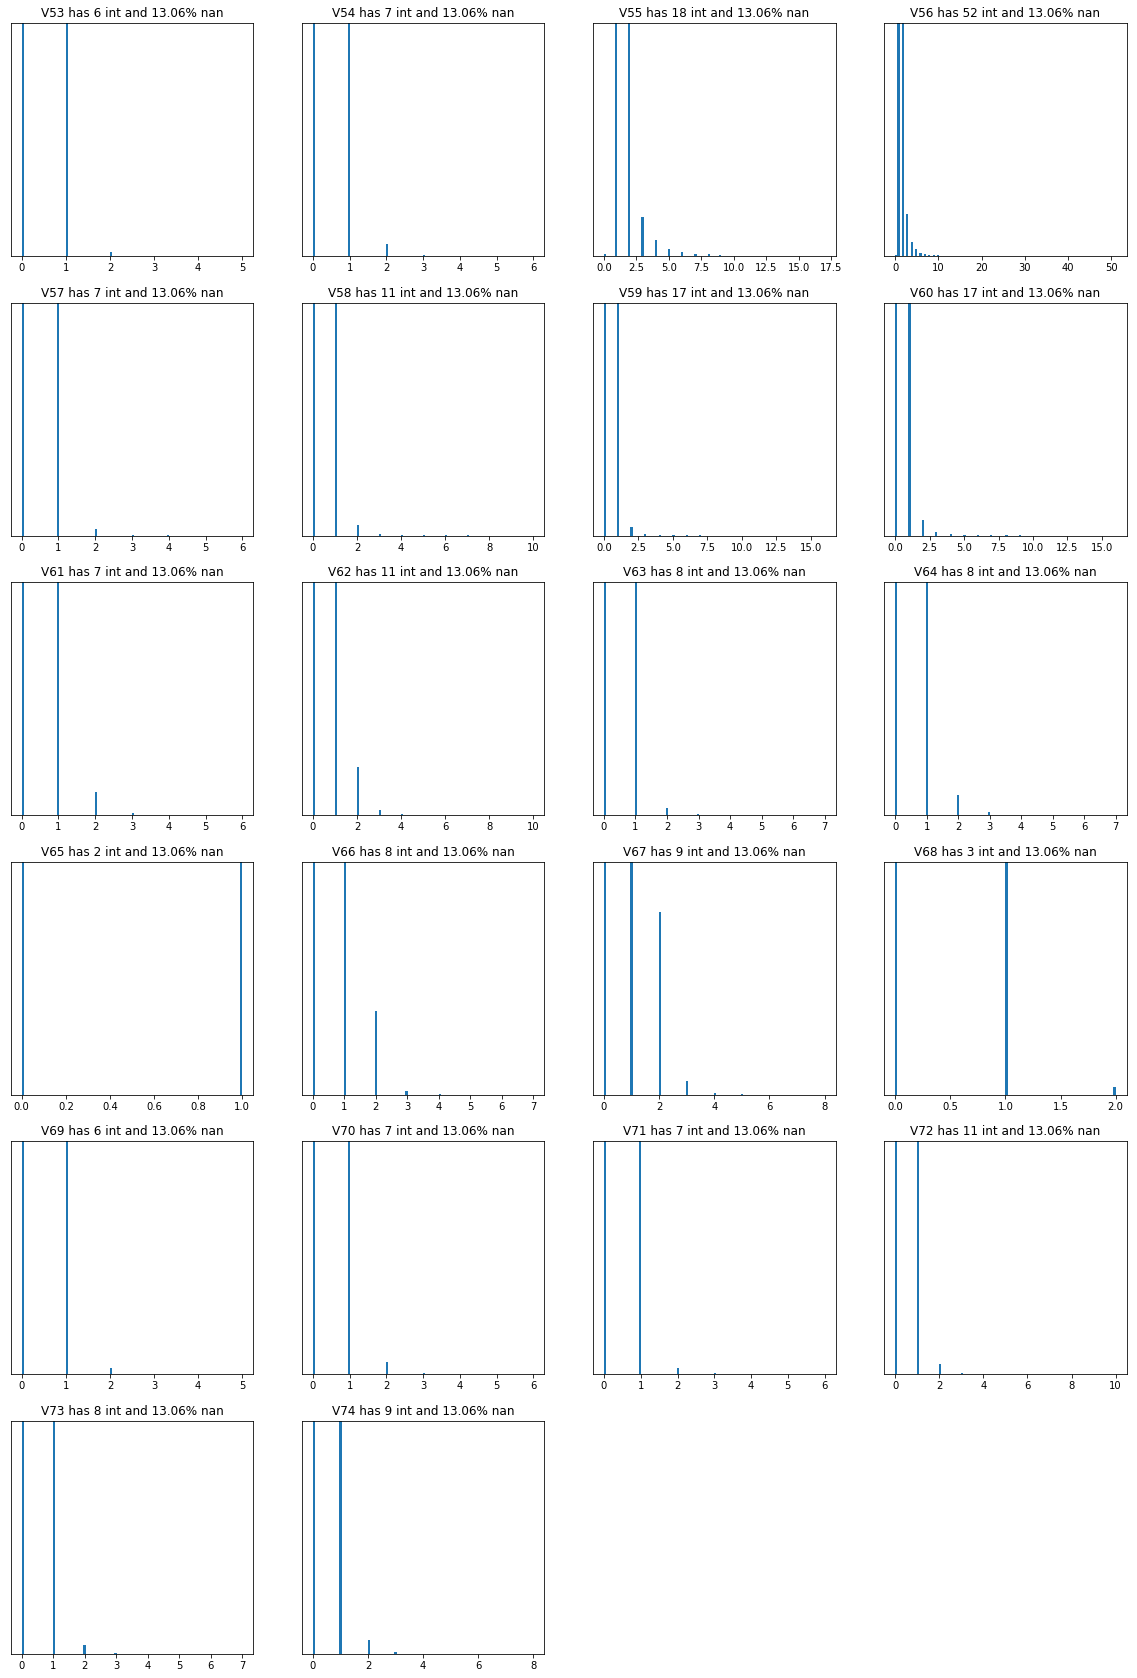

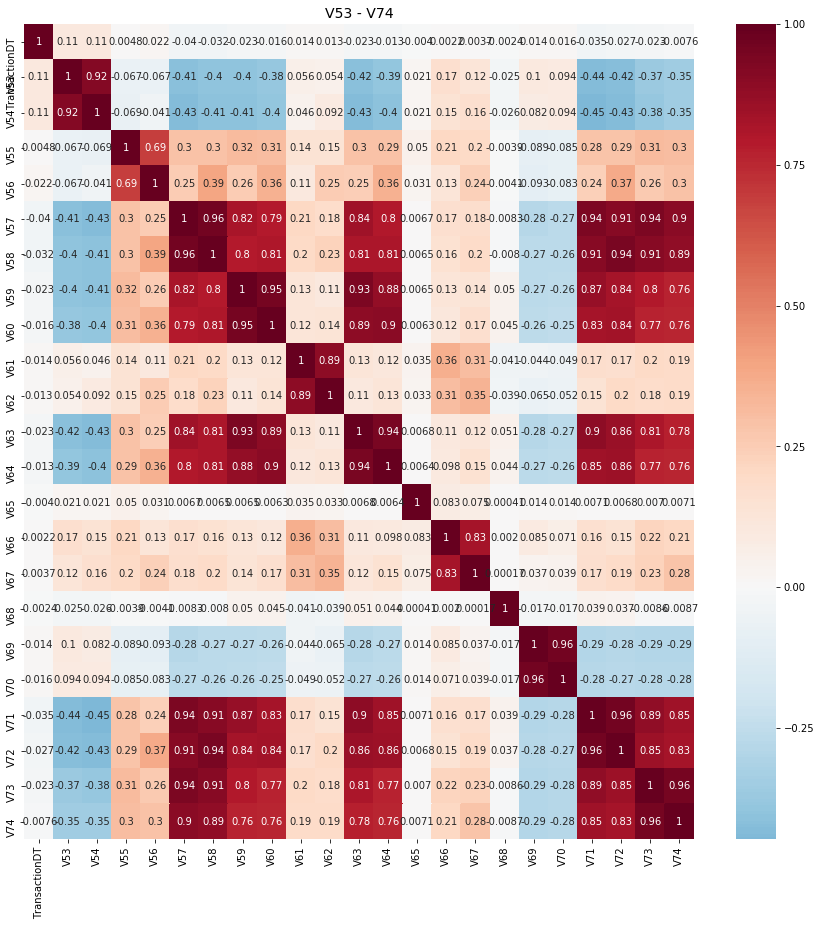

In [81]:
Vs = nans_groups[77096]
make_plots(Vs)
make_corr(Vs)

In [82]:
grps = [[53,54],[55,56],[57,58,59,60,63,64,71,72,73,74],[61,62],[65],[66,67],[68],[69,70]]
reduce_group(grps)

Use these [54, 56, 59, 62, 65, 67, 68, 70]


# V75 - V94

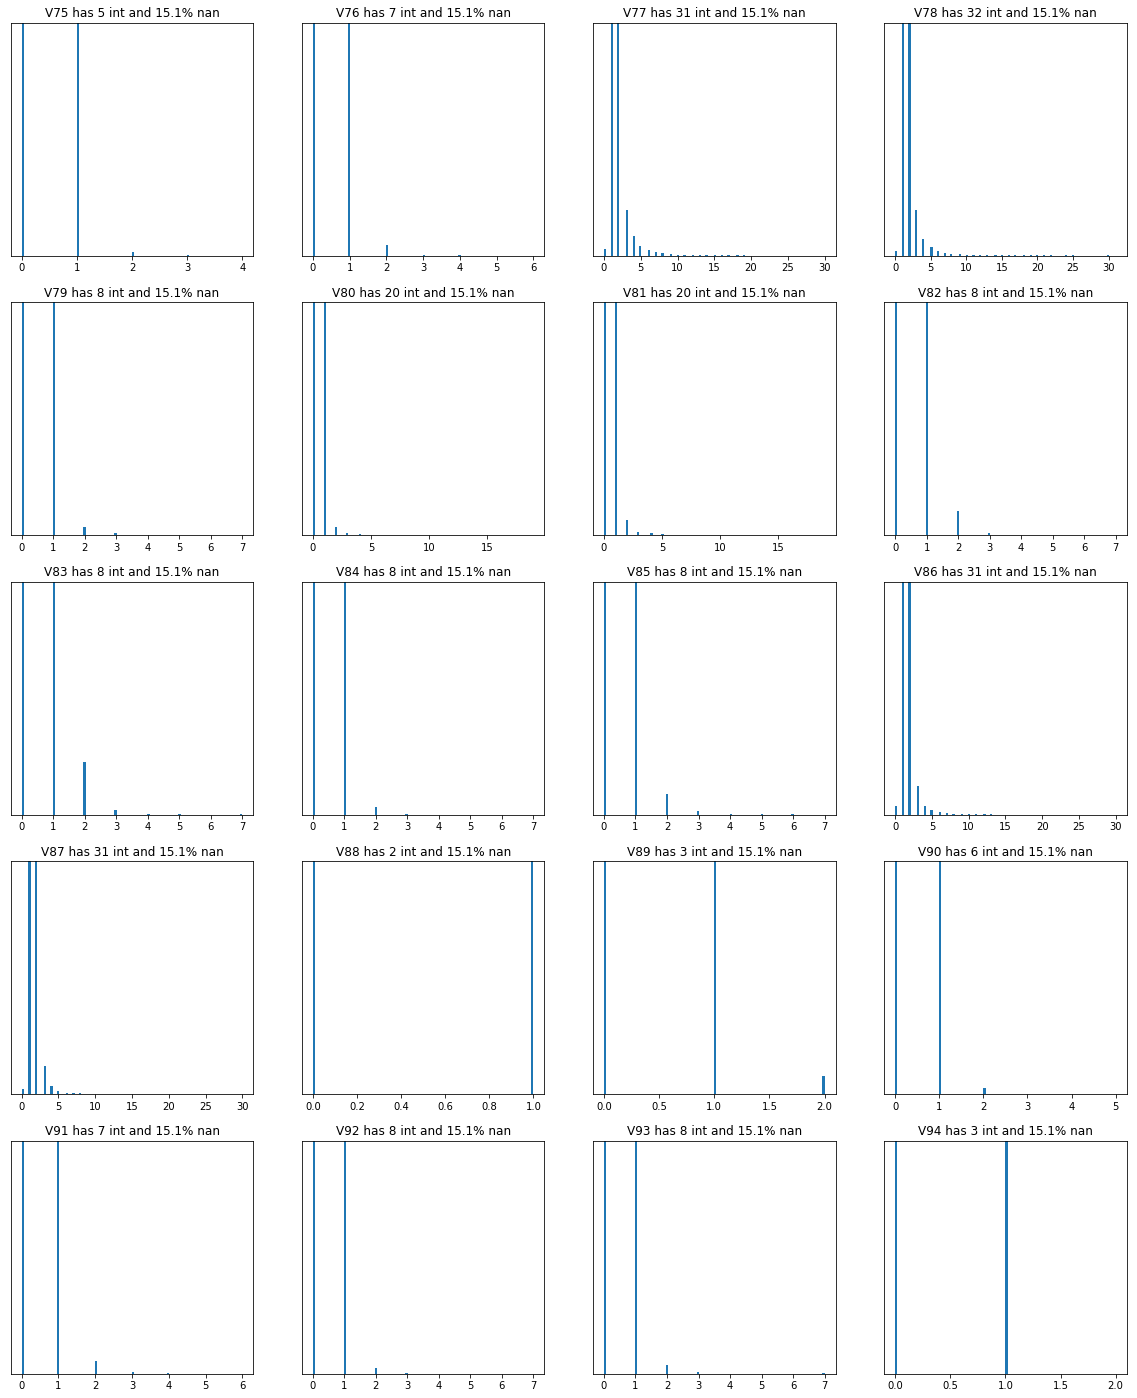

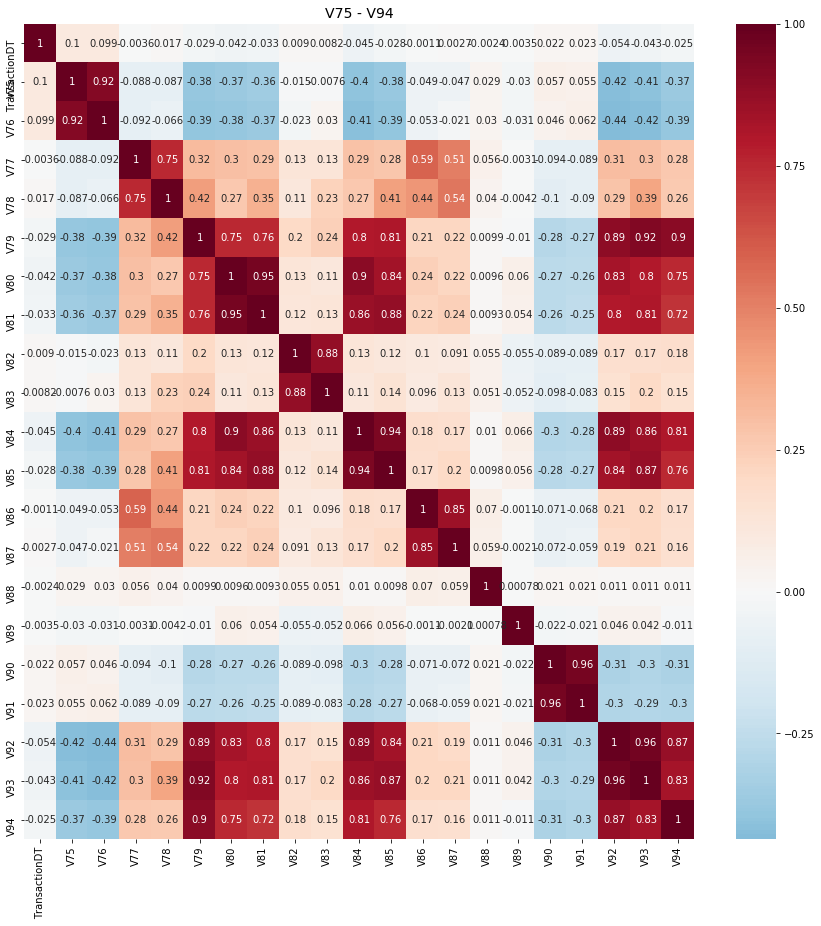

In [83]:
Vs = nans_groups[89164]
make_plots(Vs)
make_corr(Vs)

In [84]:
grps = [[75,76],[77,78],[79,80,81,84,85,92,93,94],[82,83],[86,87],[88],[89],[90,91]]
reduce_group(grps)

Use these [76, 78, 80, 82, 86, 88, 89, 91]


# V95 - V137

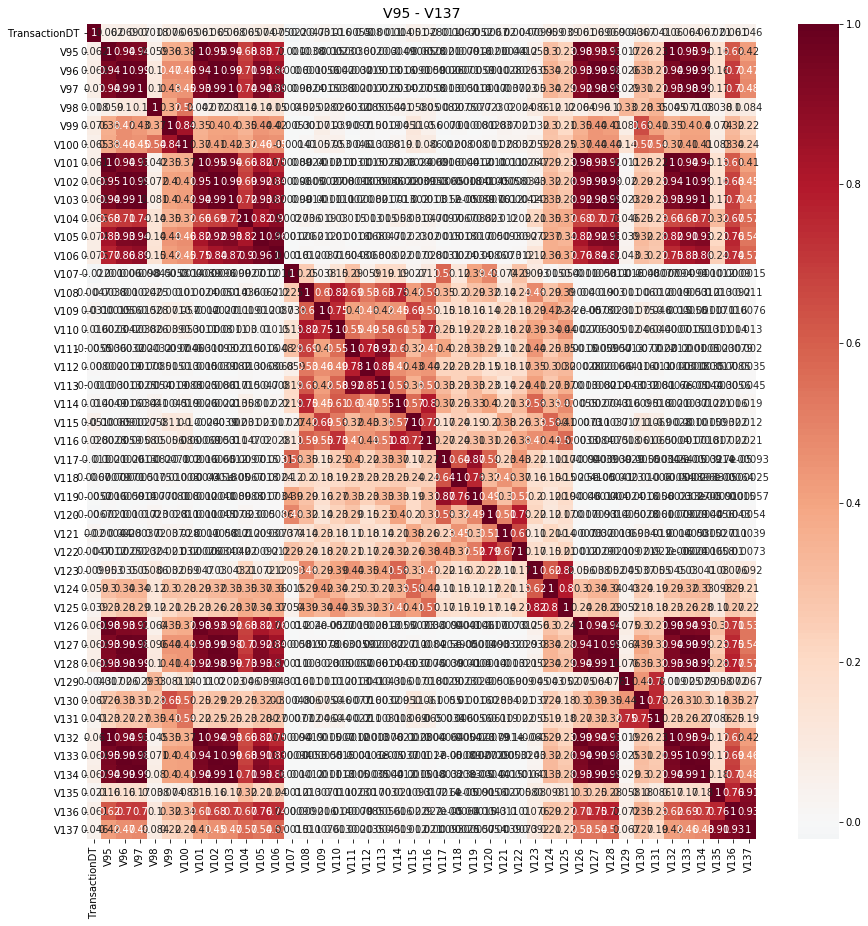

In [85]:
Vs = nans_groups[314]
make_corr(Vs)

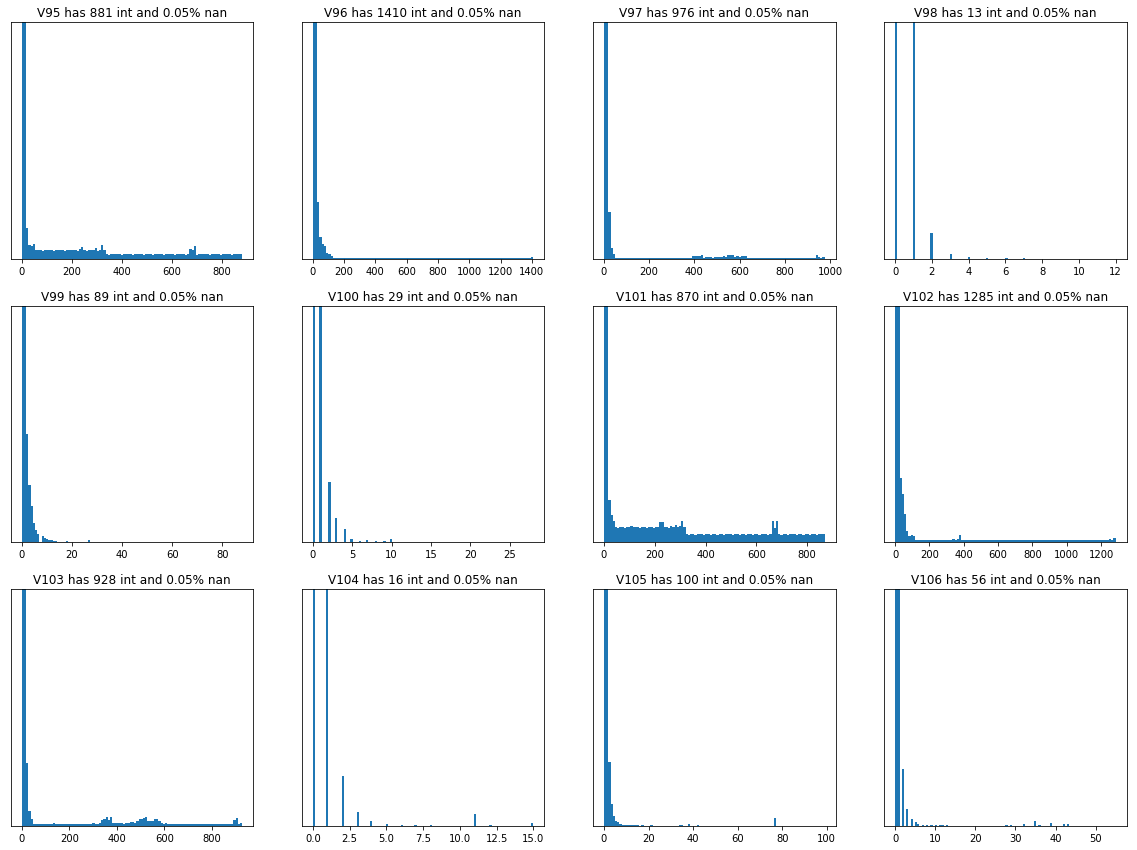

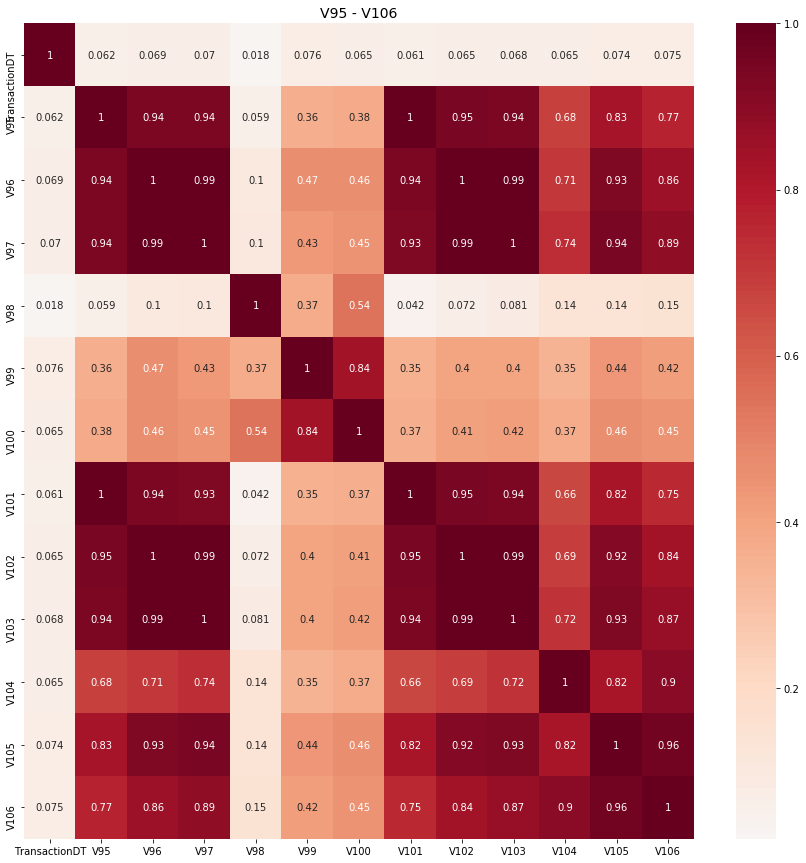

In [86]:
Vs = ['V'+str(x) for x in range(95,107)]
make_plots(Vs)
make_corr(Vs)

In [87]:
grps = [[95,96,97,101,102,103,105,106],[98],[99,100],[104]]
reduce_group(grps)

Use these [96, 98, 99, 104]


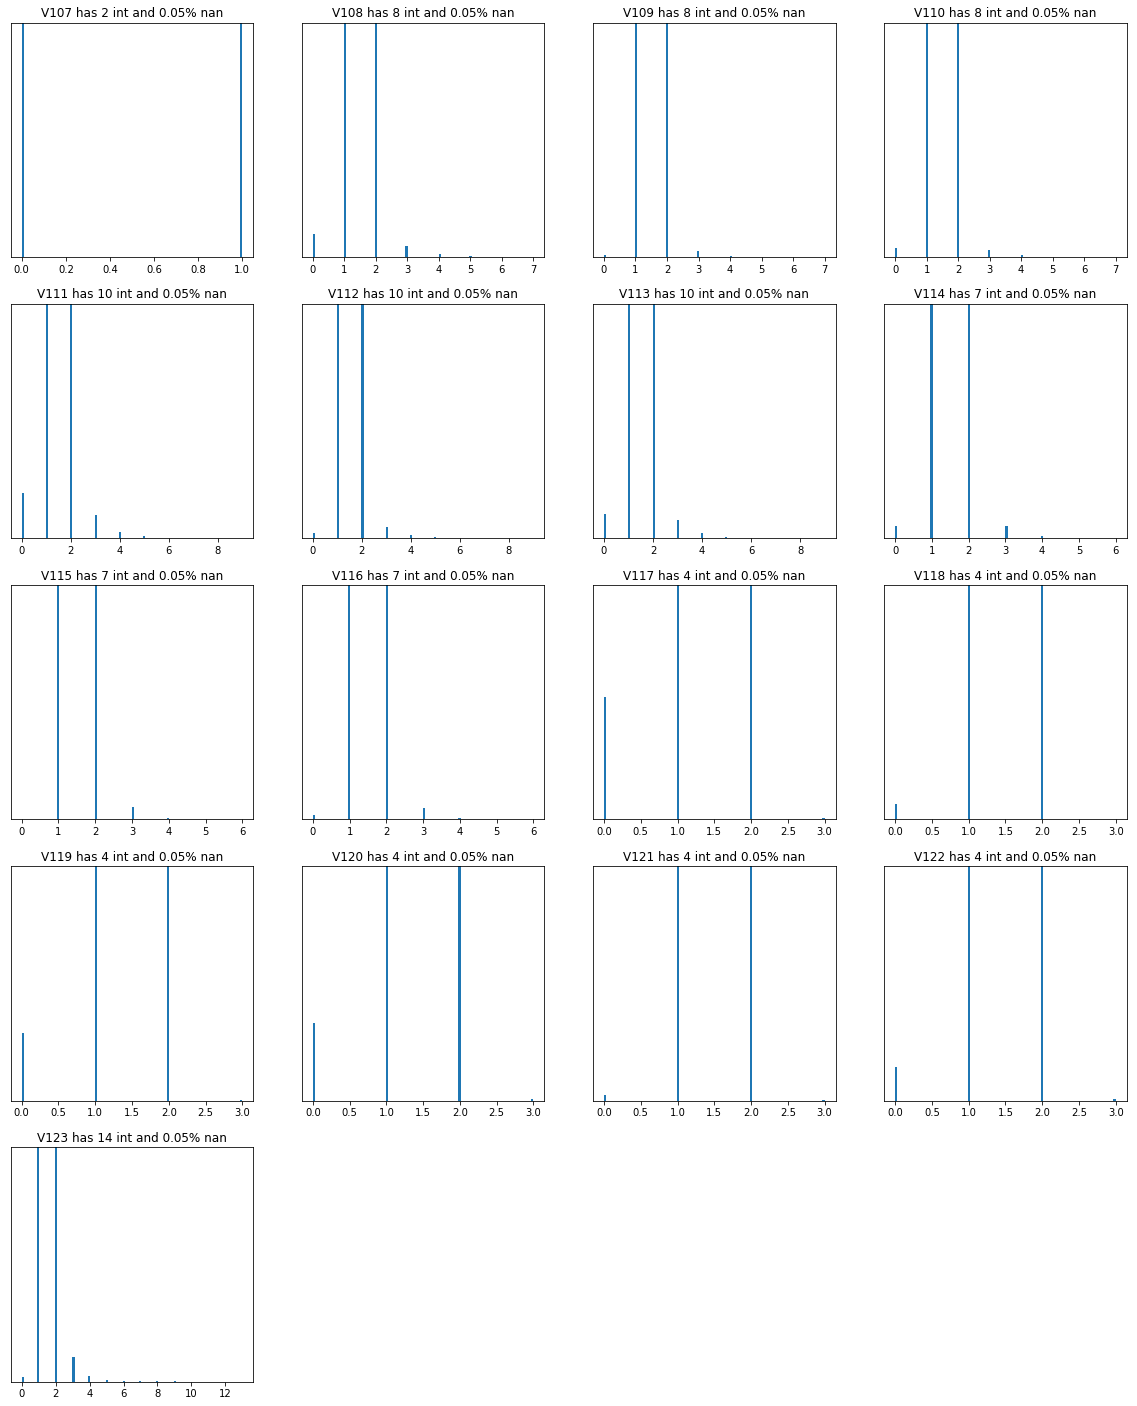

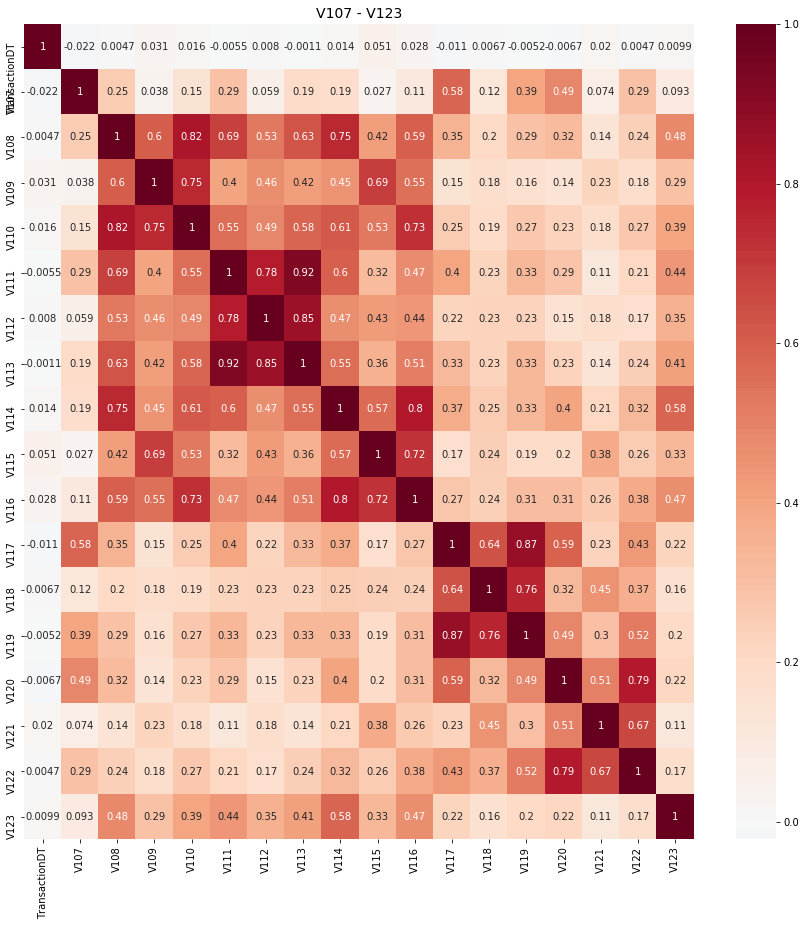

In [88]:
Vs = ['V'+str(x) for x in range(107,124)]
make_plots(Vs)
make_corr(Vs)

In [89]:
grps = [[107],[108,109,110,114],[111,112,113],[115,116],[117,118,119],[120,122],[121],[123]]
reduce_group(grps)

Use these [107, 108, 111, 115, 117, 120, 121, 123]


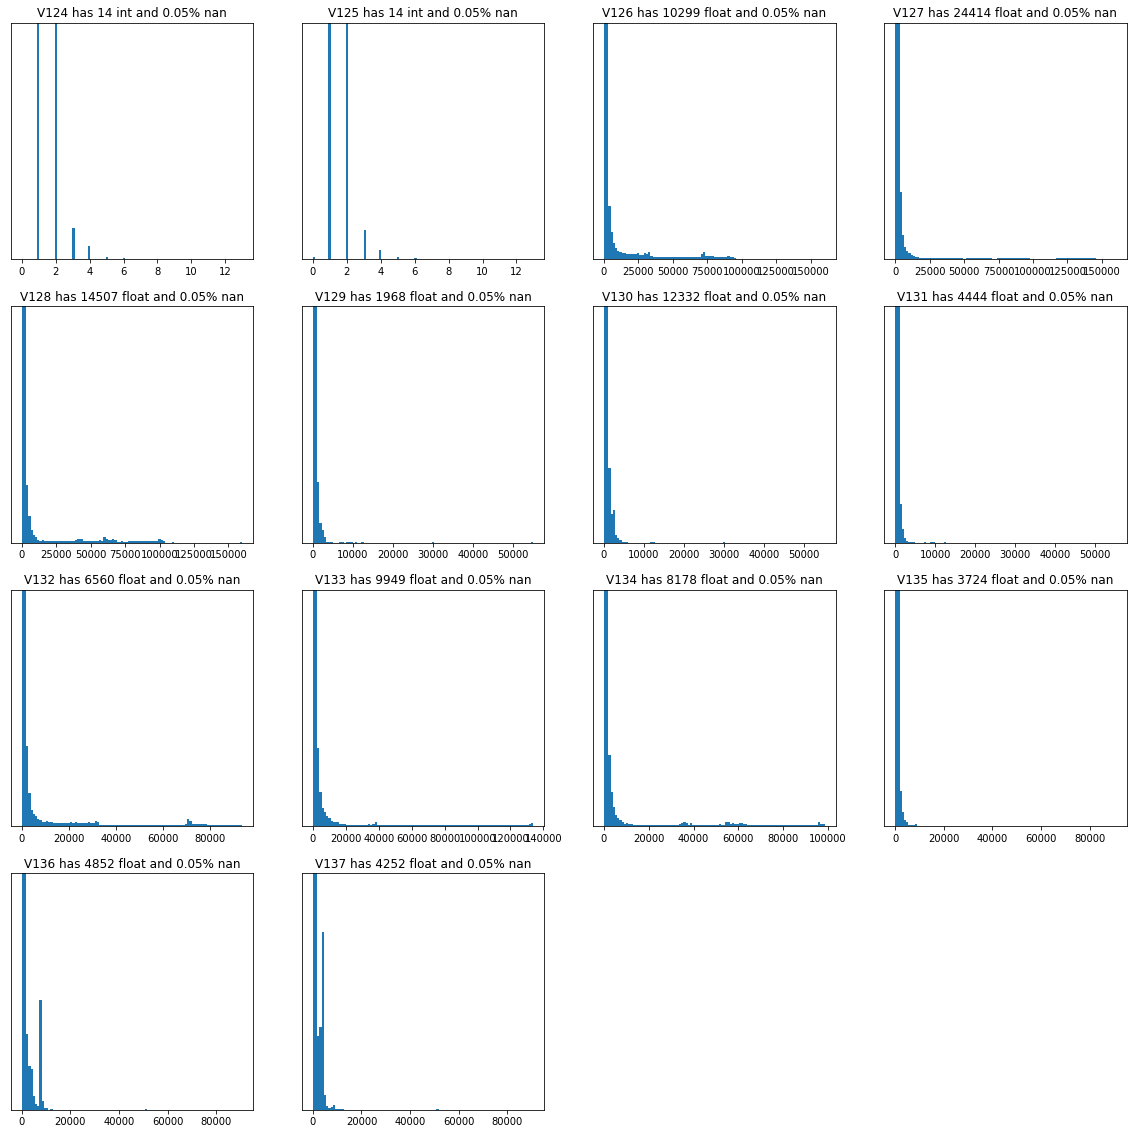

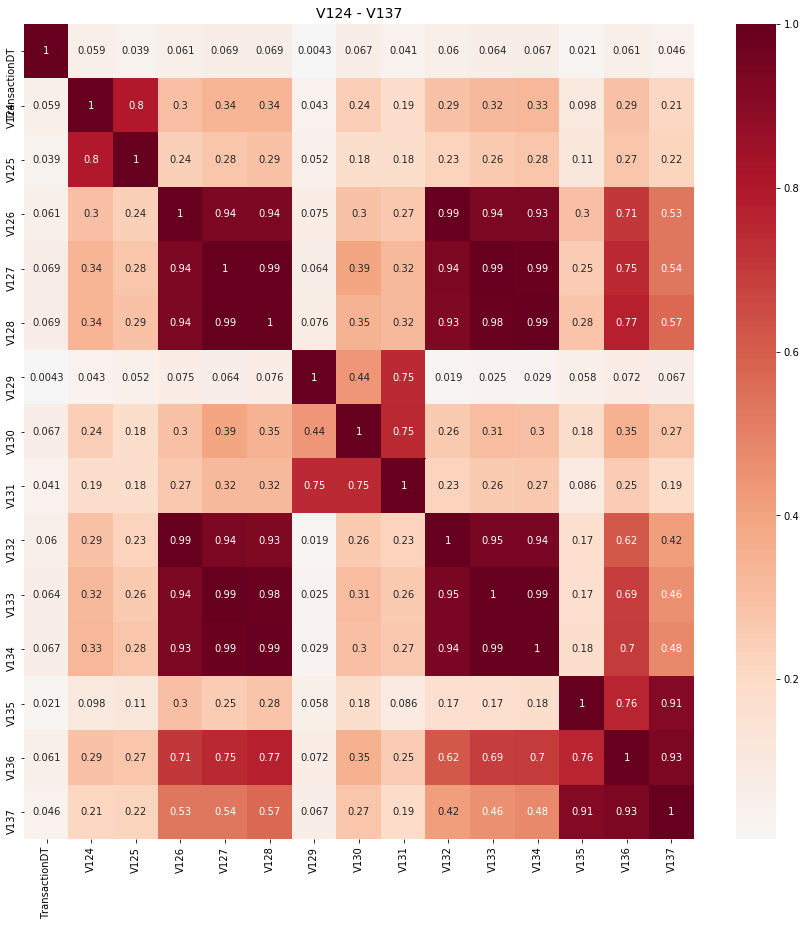

In [90]:
Vs = ['V'+str(x) for x in range(124,138)]
make_plots(Vs)
make_corr(Vs)

In [91]:
grps = [[124,125],[126,127,128,132,133,134],[129],[130,131],[135,136,137]]
reduce_group(grps)

Use these [124, 127, 129, 130, 136]


# V138 ~ V163

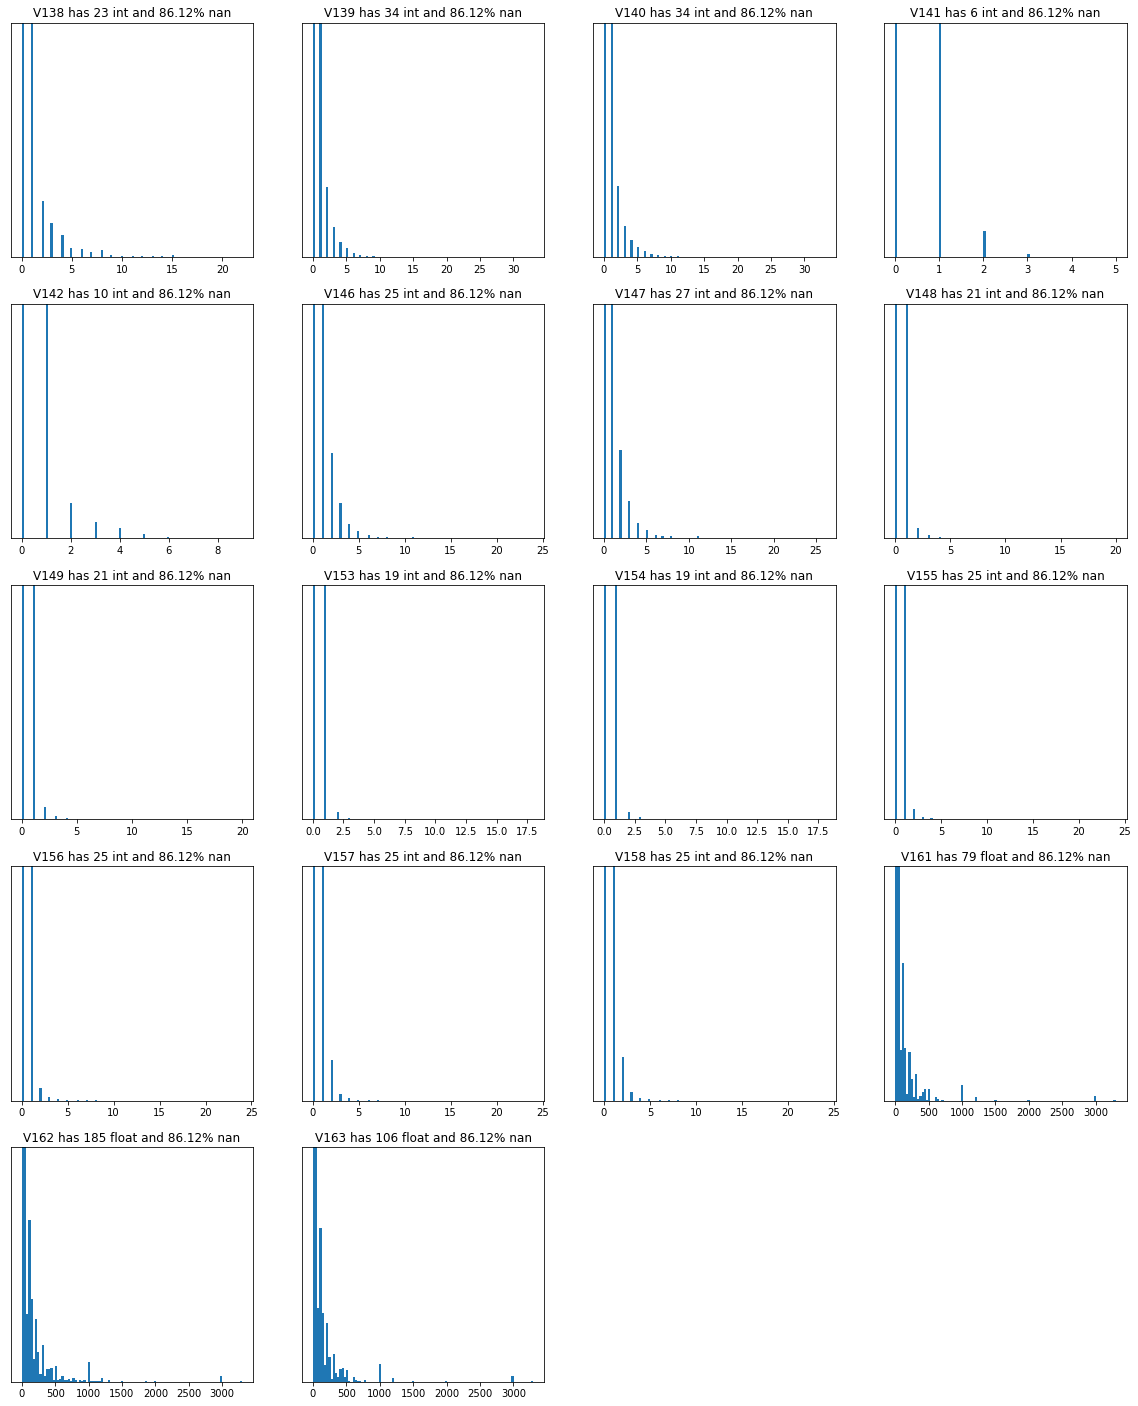

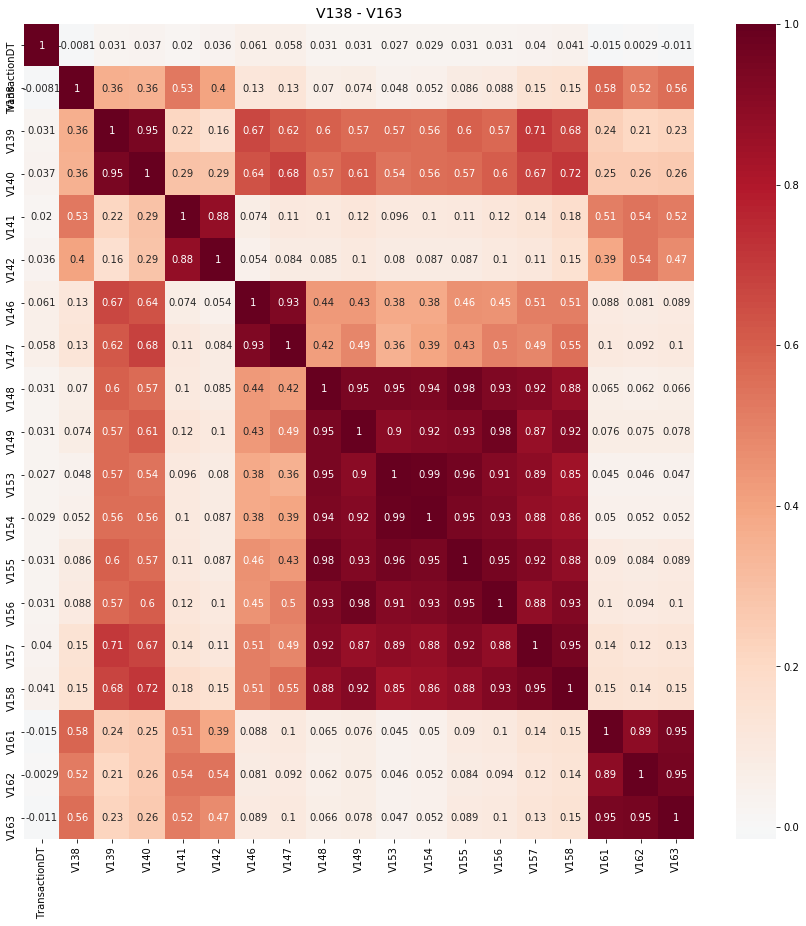

In [92]:
Vs = nans_groups[508595]
make_plots(Vs)
make_corr(Vs)

In [93]:
grps = [[138],[139,140],[141,142],[146,147],[148,149,153,154,156,157,158],[161,162,163]]
reduce_group(grps)

Use these [138, 139, 142, 147, 156, 162]


# V143 ~ V166

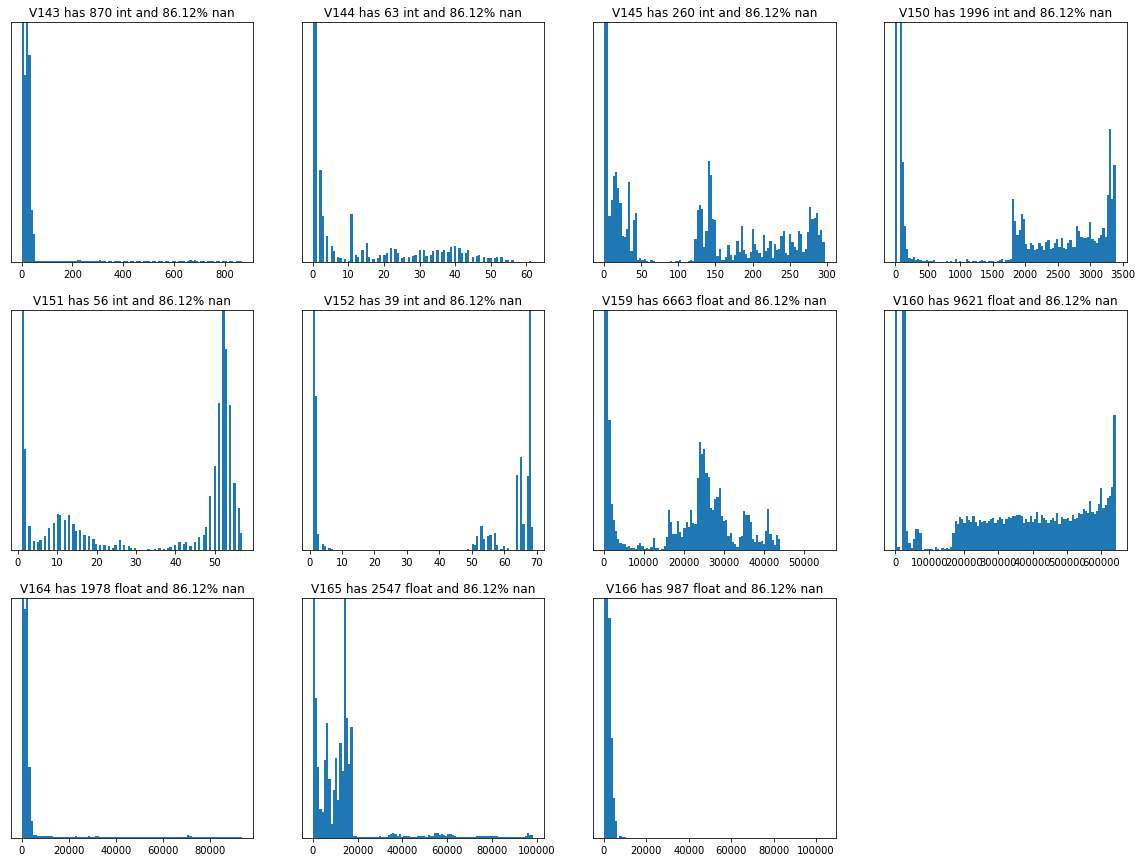

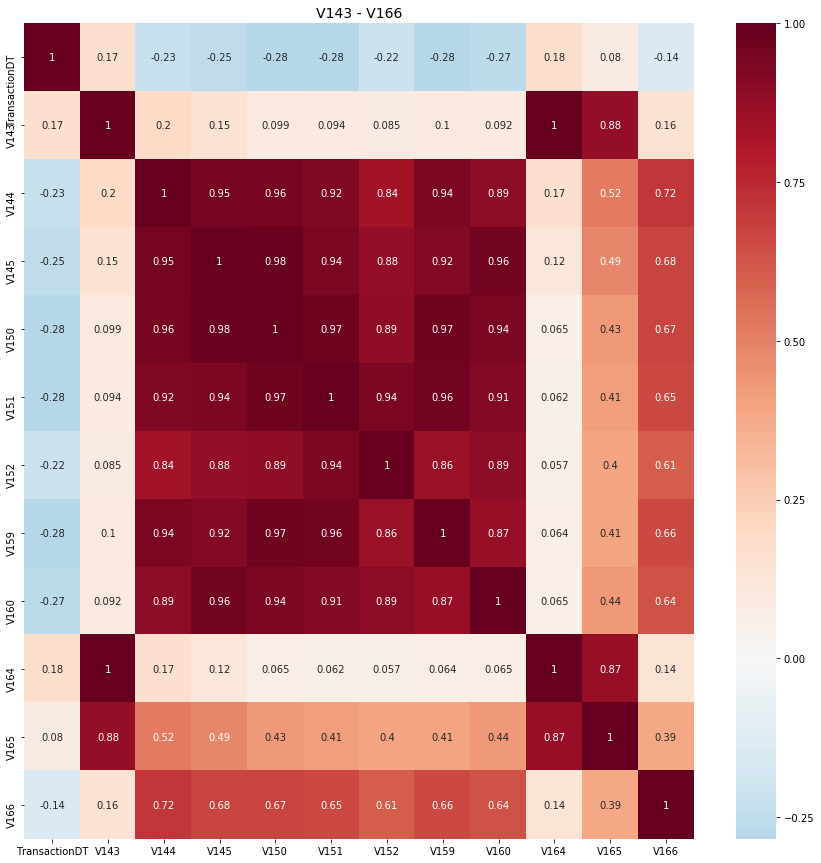

In [94]:
Vs = nans_groups[508589]
make_plots(Vs)
make_corr(Vs)

In [95]:
grps = [[143,164,165],[144,145,150,151,152,159,160],[166]]
reduce_group(grps)

Use these [165, 160, 166]


# V167 ~ V216

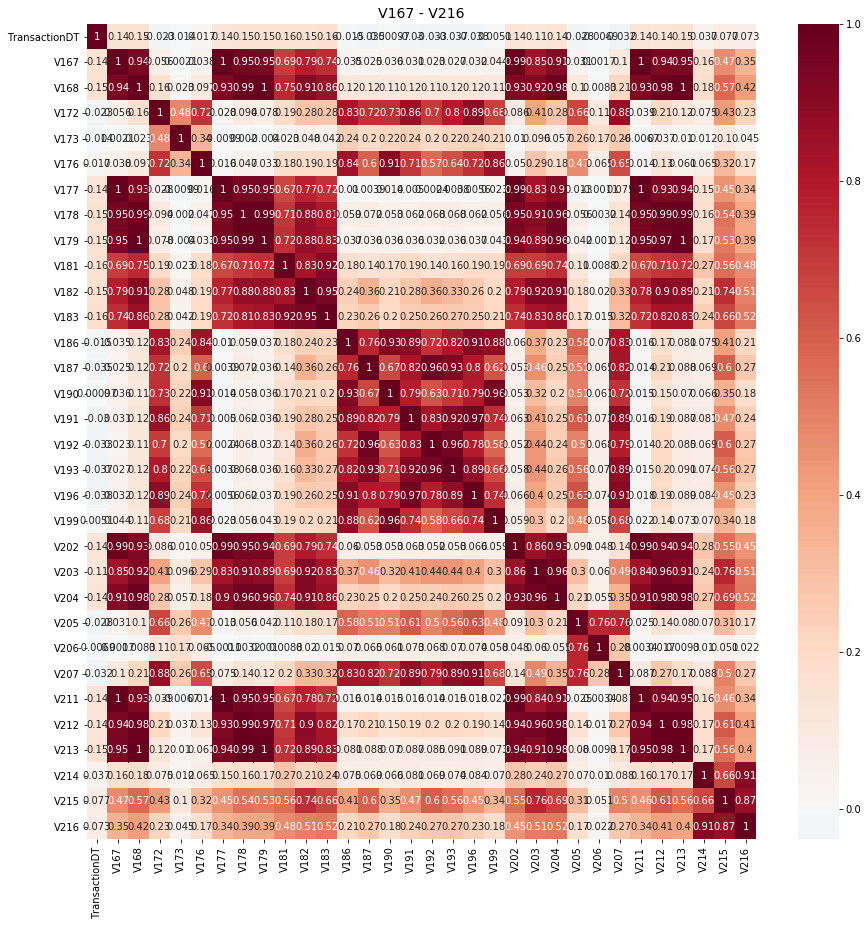

In [96]:
Vs = [x for x in nans_groups[450909]]
make_corr(Vs)

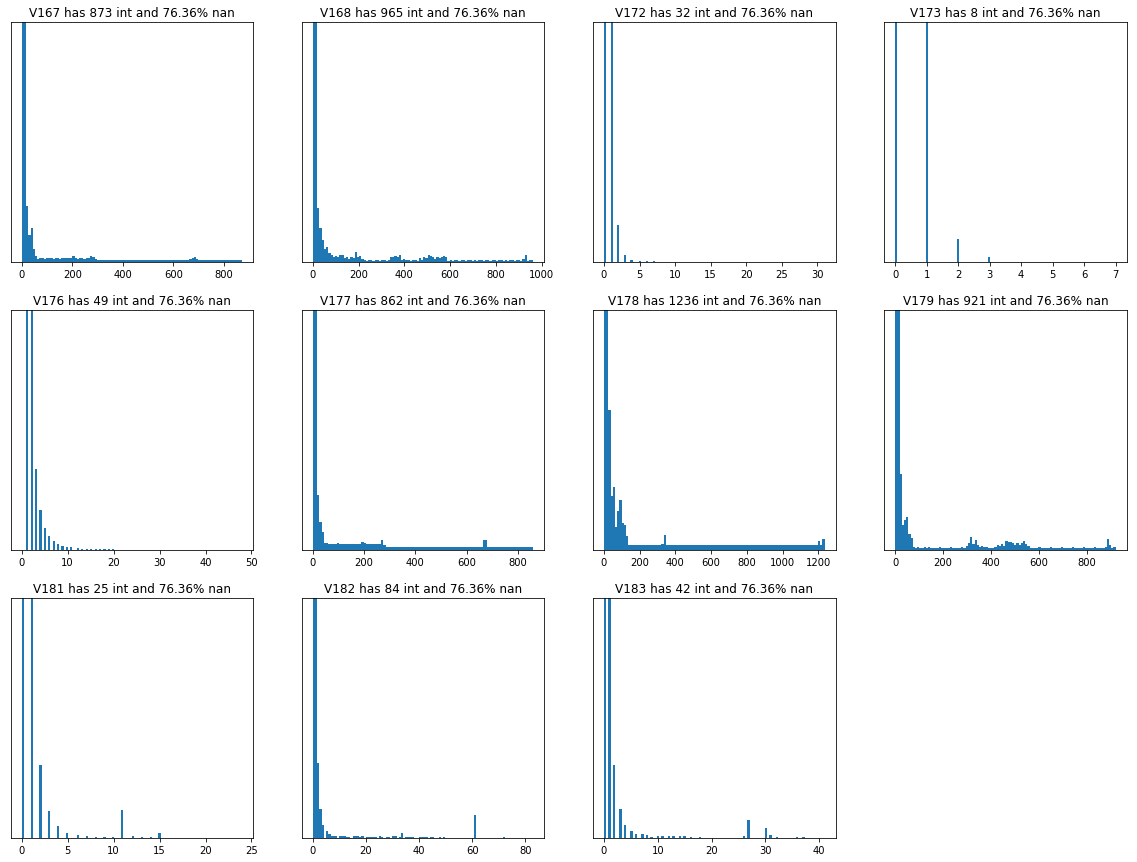

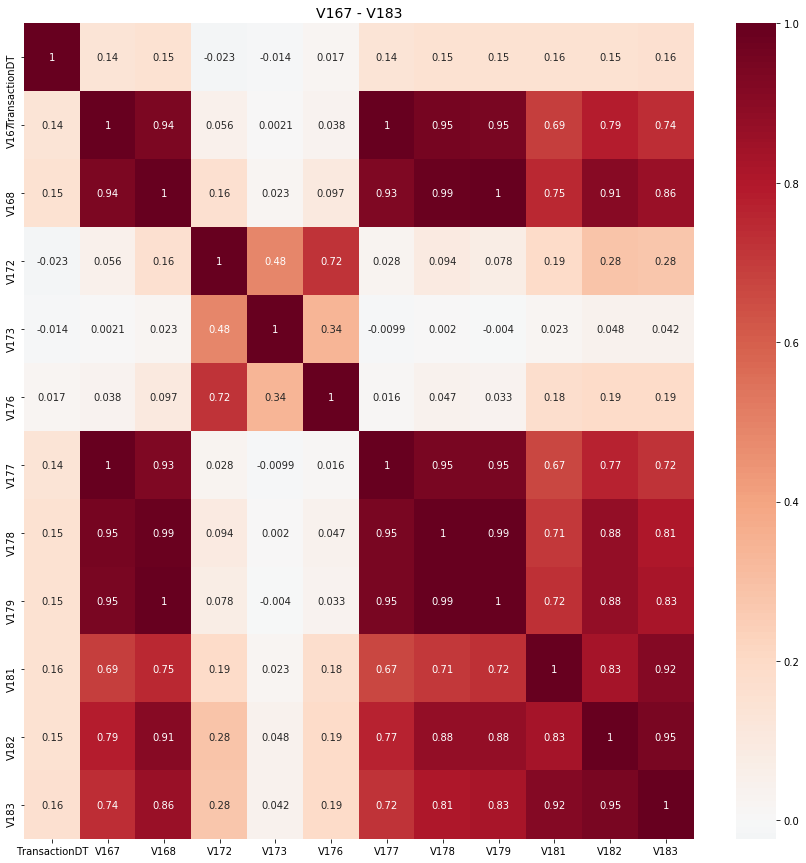

In [97]:
Vs = [x for x in nans_groups[450909] if int(x[1:])<186]
make_plots(Vs)
make_corr(Vs)

In [98]:
grps = [[167,168,177,178,179],[172,176],[173],[181,182,183]]
reduce_group(grps)

Use these [178, 176, 173, 182]


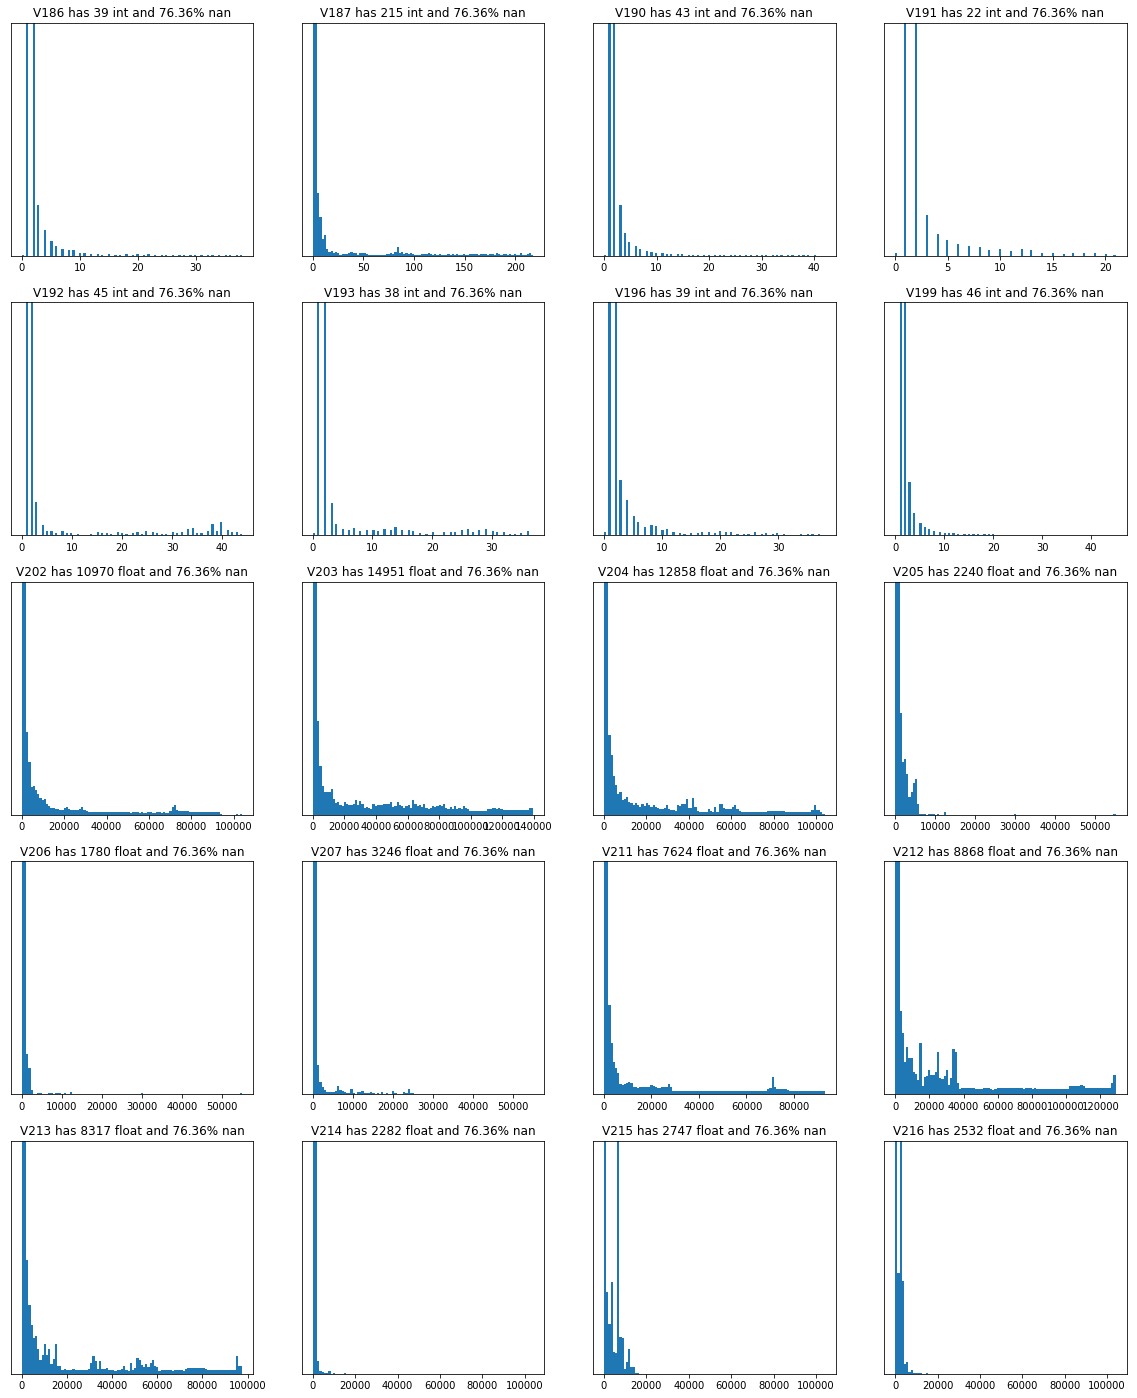

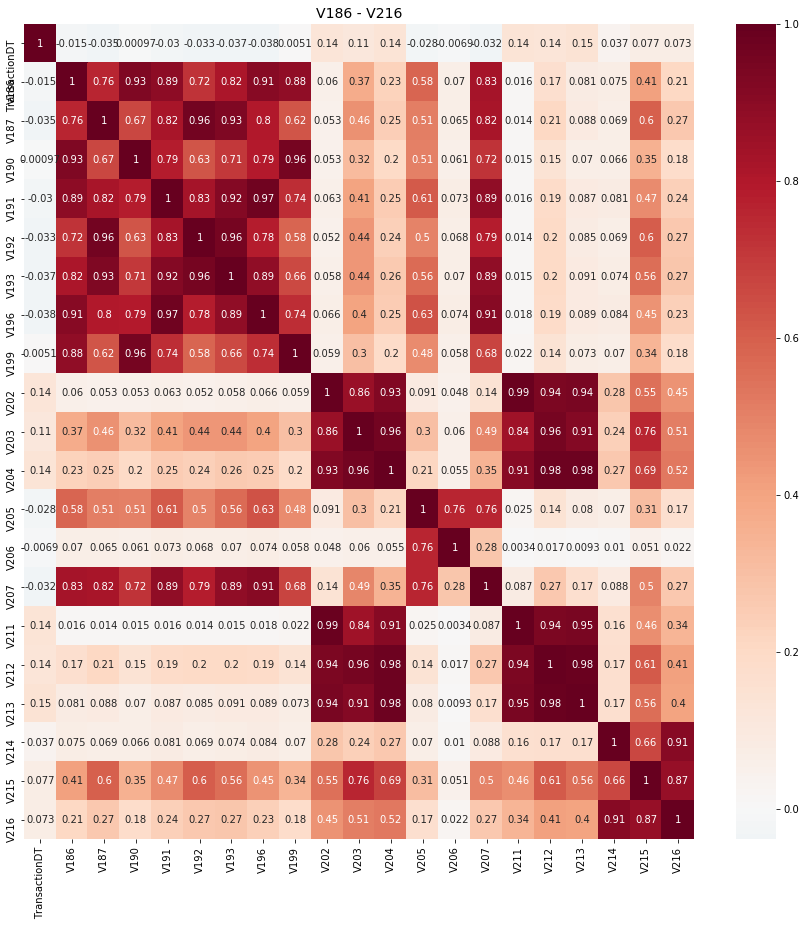

In [99]:
Vs = [x for x in nans_groups[450909] if (int(x[1:])>183)]
make_plots(Vs)
make_corr(Vs)

In [100]:
grps = [[186,187,190,191,192,193,196,199],[202,203,204,211,212,213],[205,206],[207],[214,215,216]]
reduce_group(grps)

Use these [187, 203, 205, 207, 215]


# V169 ~ V210

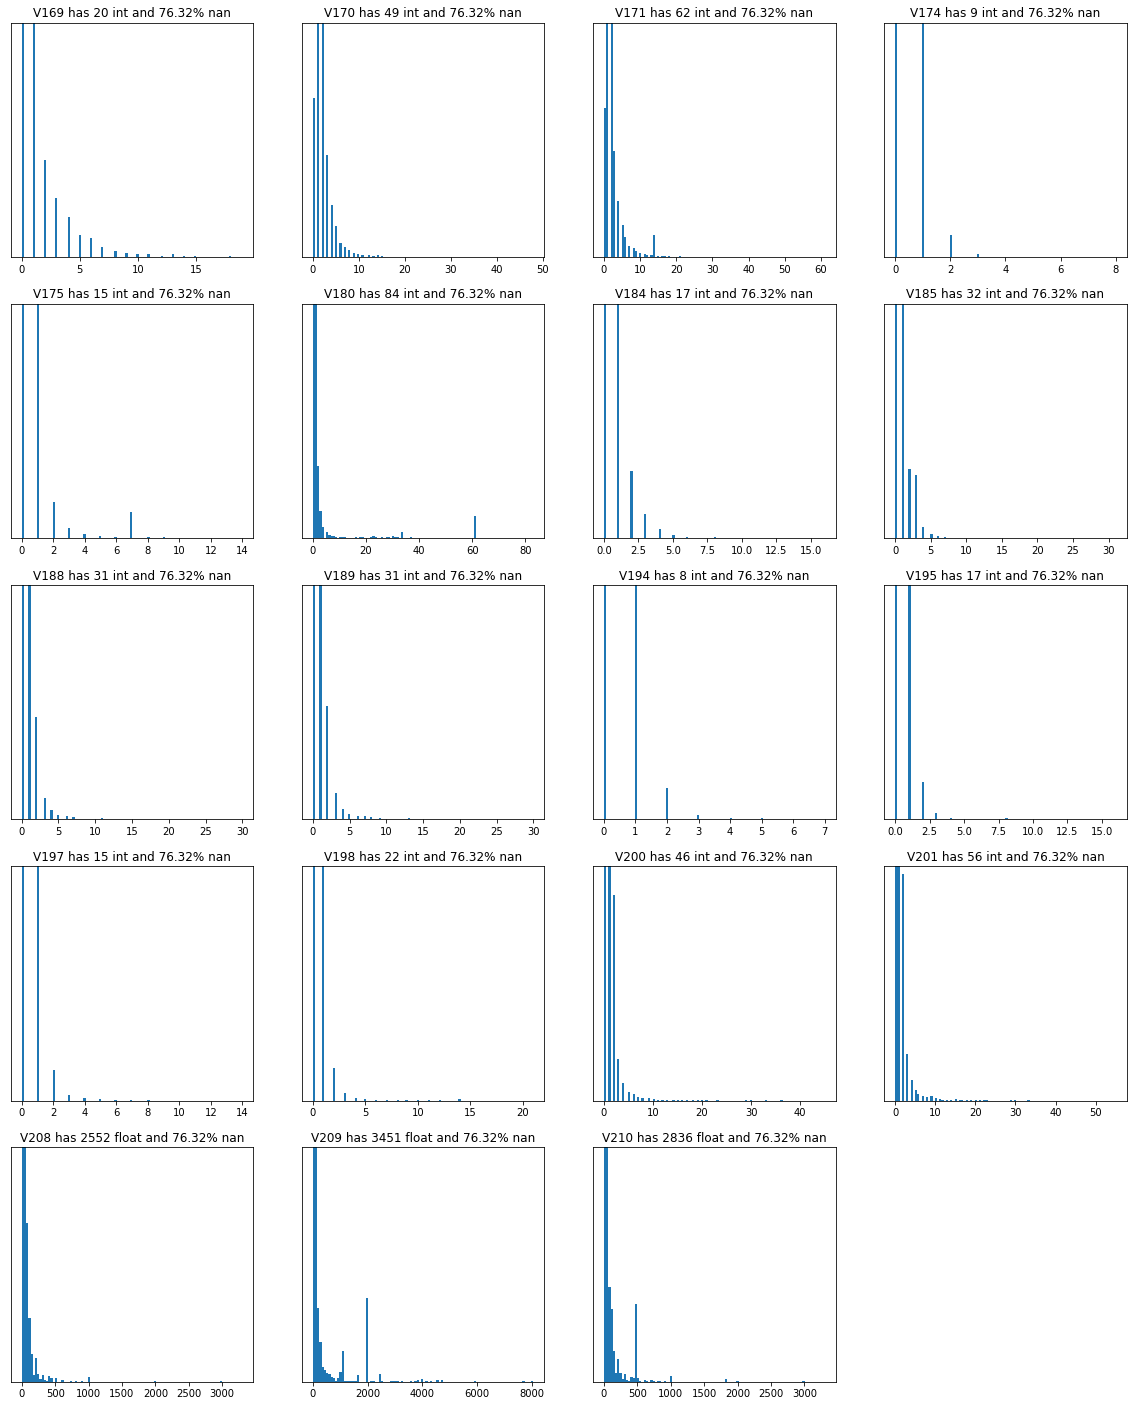

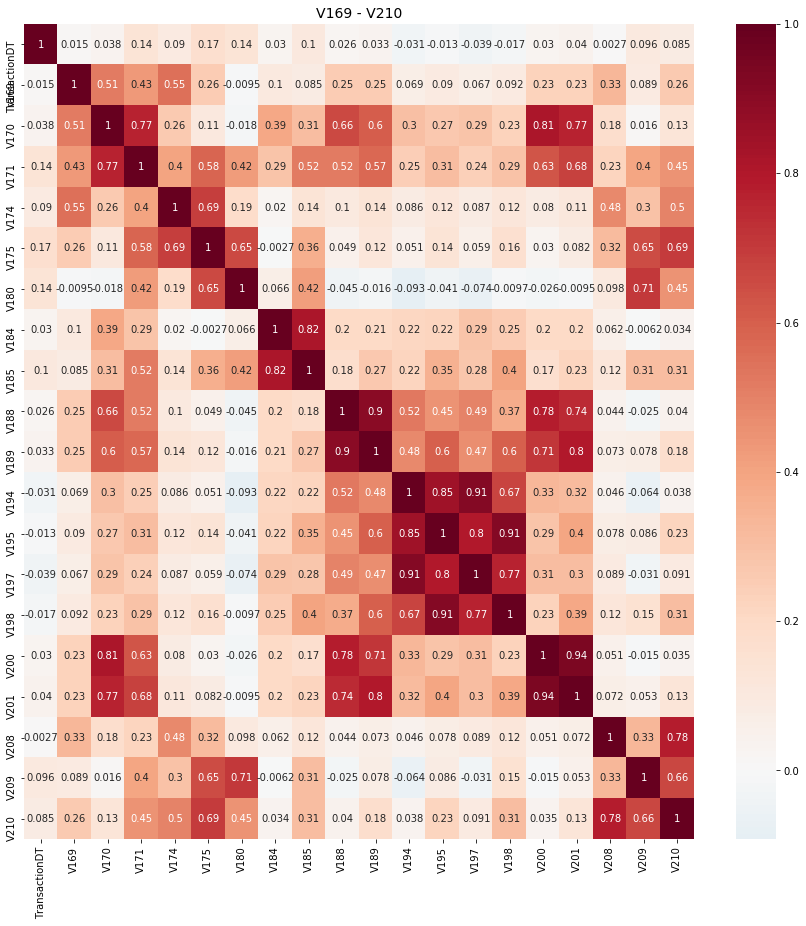

In [101]:
Vs = nans_groups[450721]
make_plots(Vs)
make_corr(Vs)

In [102]:
grps = [[169],[170,171,200,201],[174,175],[180],[184,185],[188,189],[194,195,197,198],[208,210],[209]]
reduce_group(grps)

Use these [169, 171, 175, 180, 185, 188, 198, 210, 209]


# V217 ~ V278

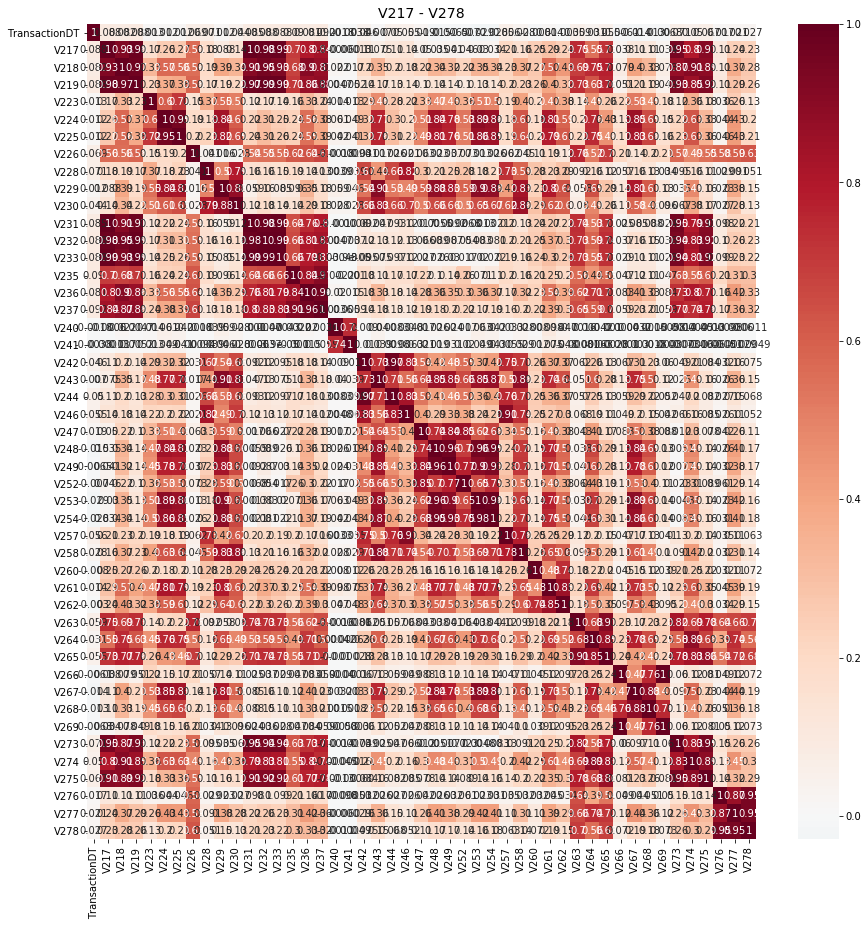

In [103]:
Vs = [x for x in nans_groups[460110]]
make_corr(Vs)

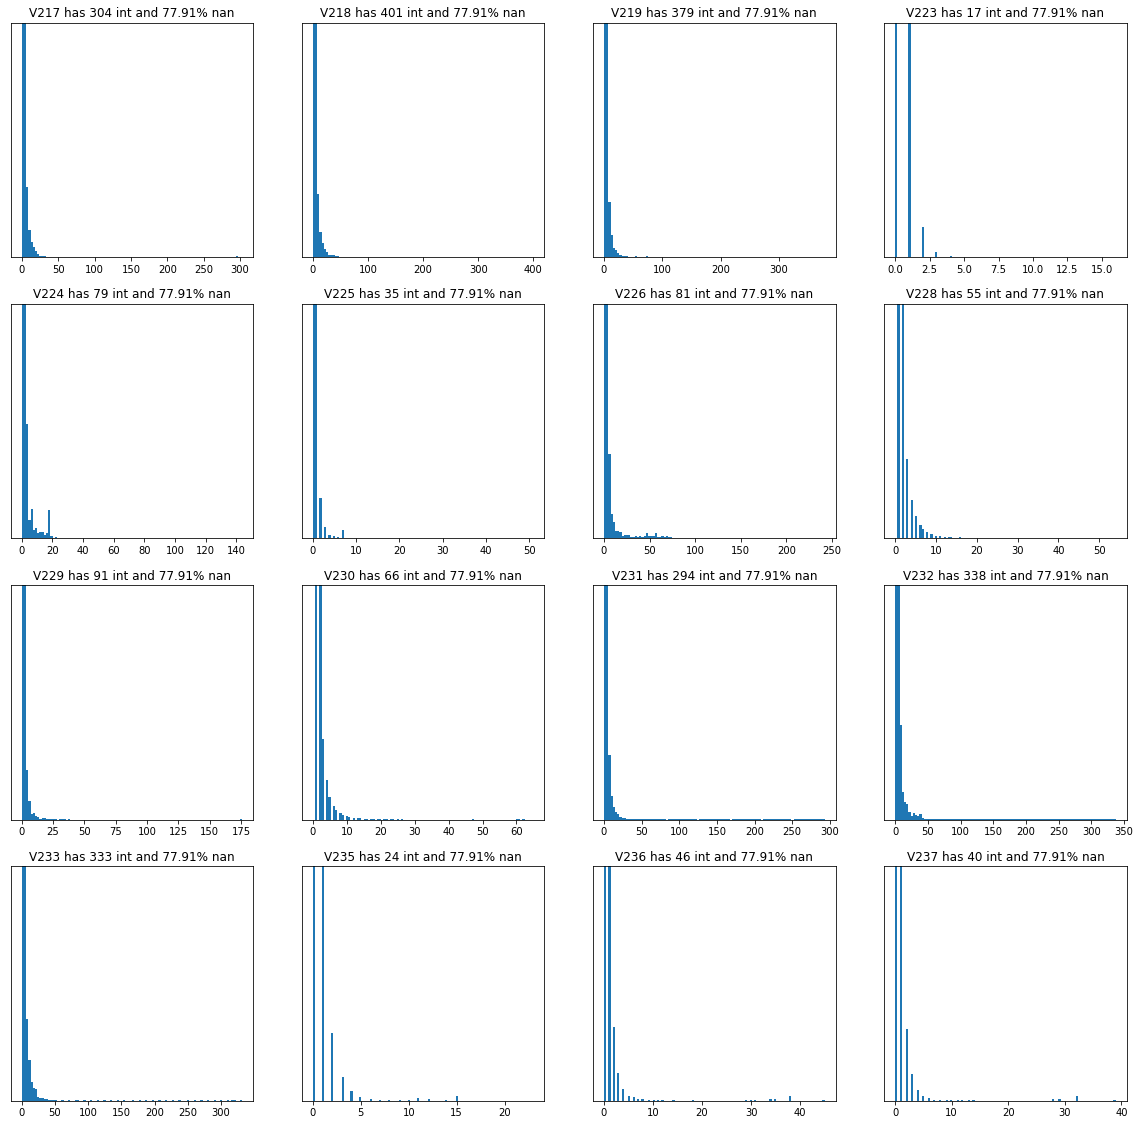

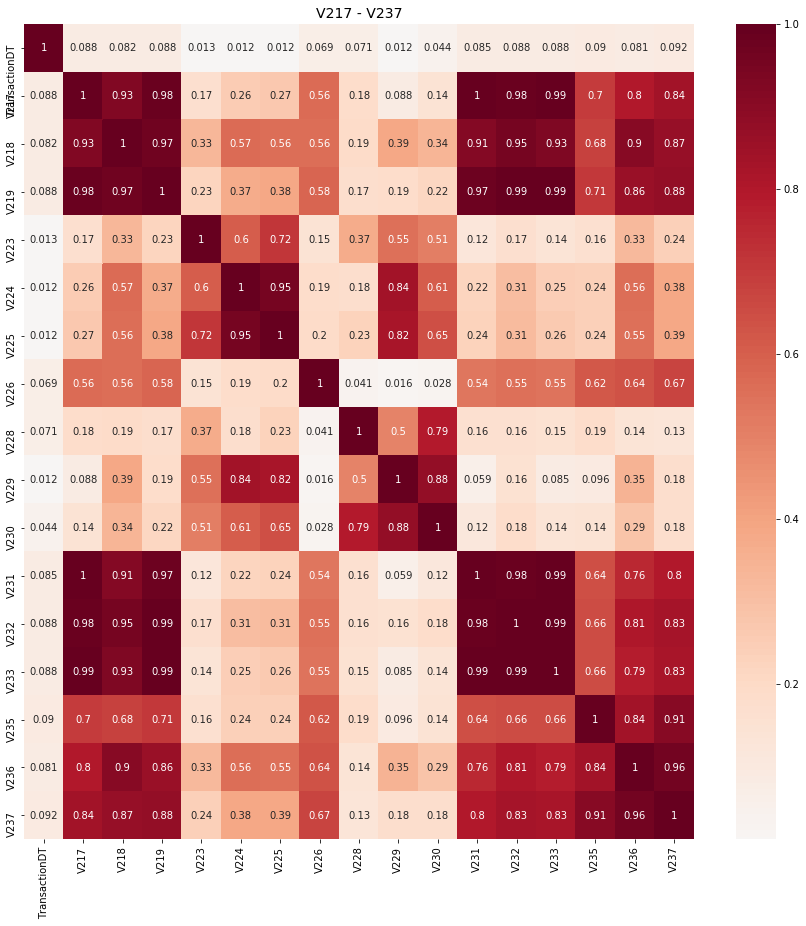

In [104]:
Vs = [x for x in nans_groups[460110] if int(x[1:])<240]
make_plots(Vs)
make_corr(Vs)

In [105]:
grps = [[217,218,219,231,232,233,236,237],[223],[224,225],[226],[228],[229,230],[235]]
reduce_group(grps)

Use these [218, 223, 224, 226, 228, 229, 235]


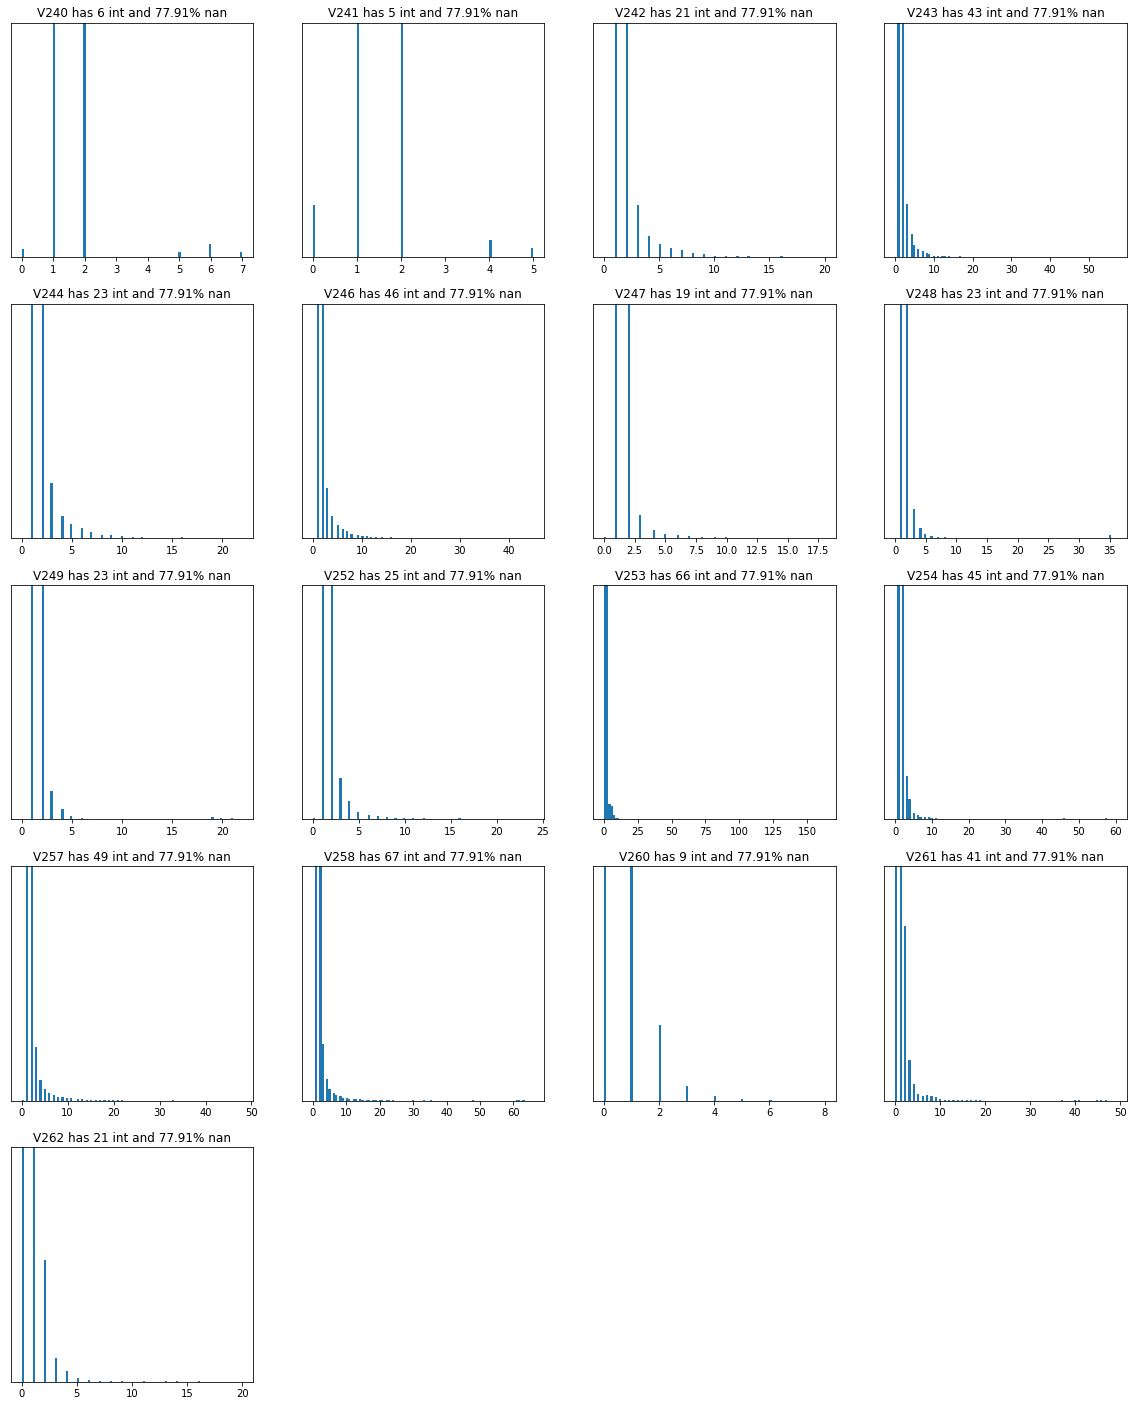

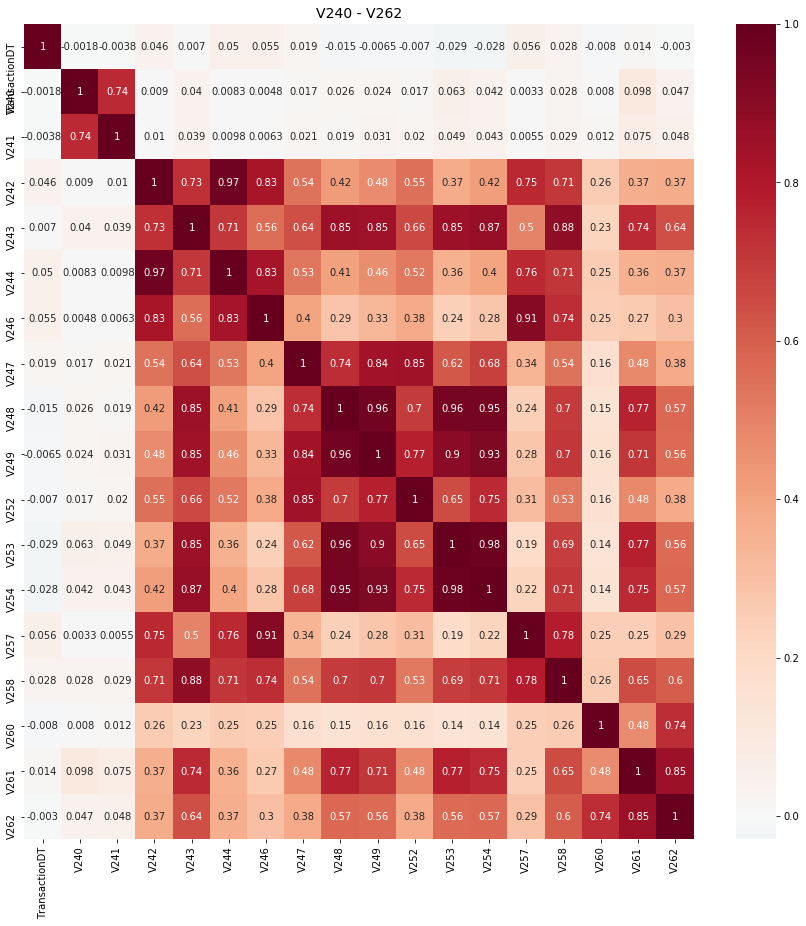

In [106]:
Vs = [x for x in nans_groups[460110] if (int(x[1:])>237)&(int(x[1:])<263)]
make_plots(Vs)
make_corr(Vs)

In [107]:
grps = [[240,241],[242,243,244,258],[246,257],[247,248,249,253,254],[252],[260],[261,262]]
reduce_group(grps)

Use these [240, 258, 257, 253, 252, 260, 261]


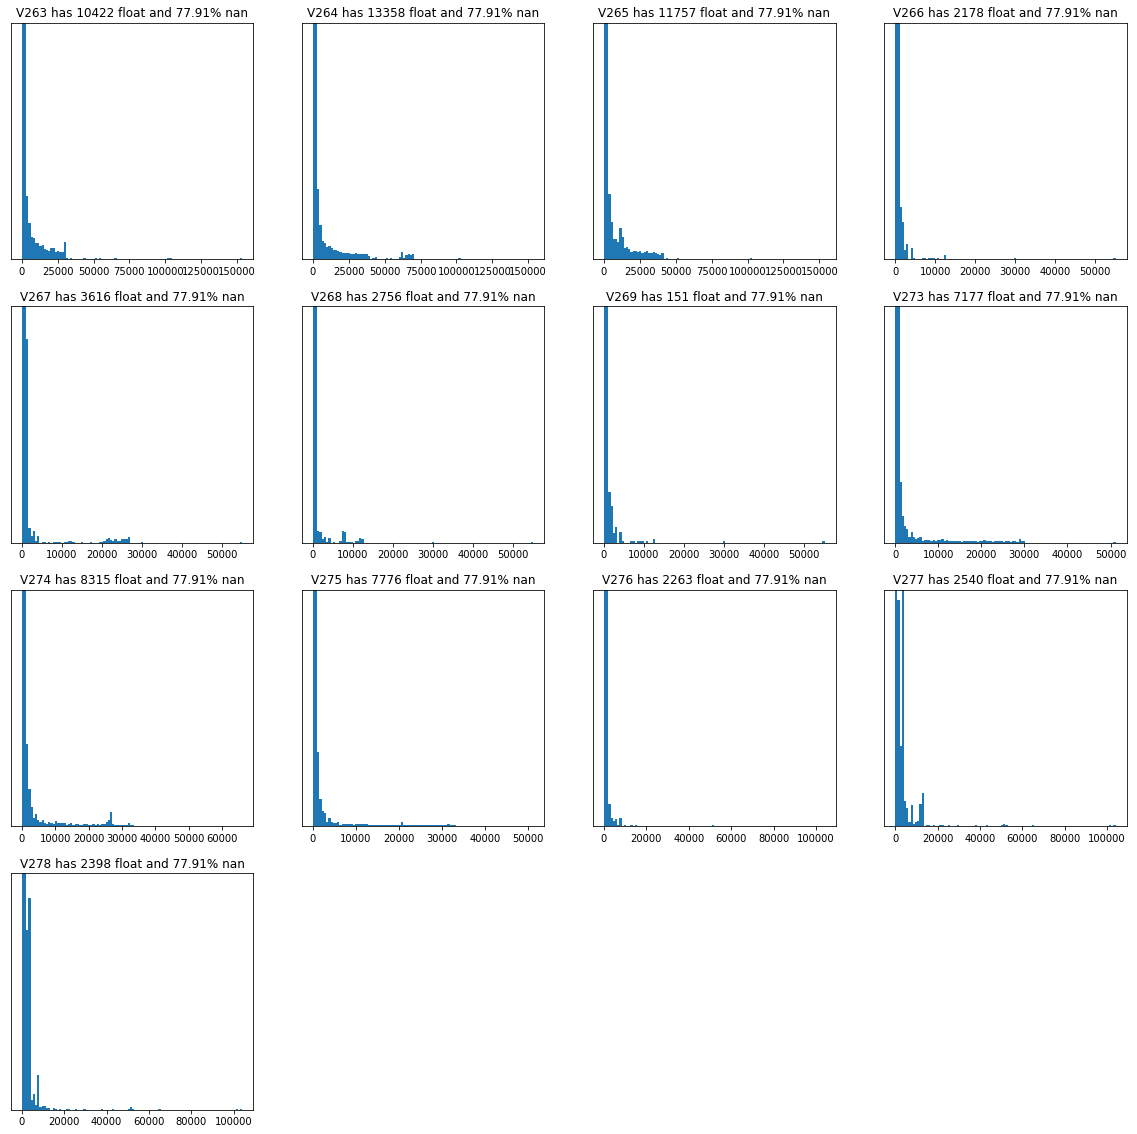

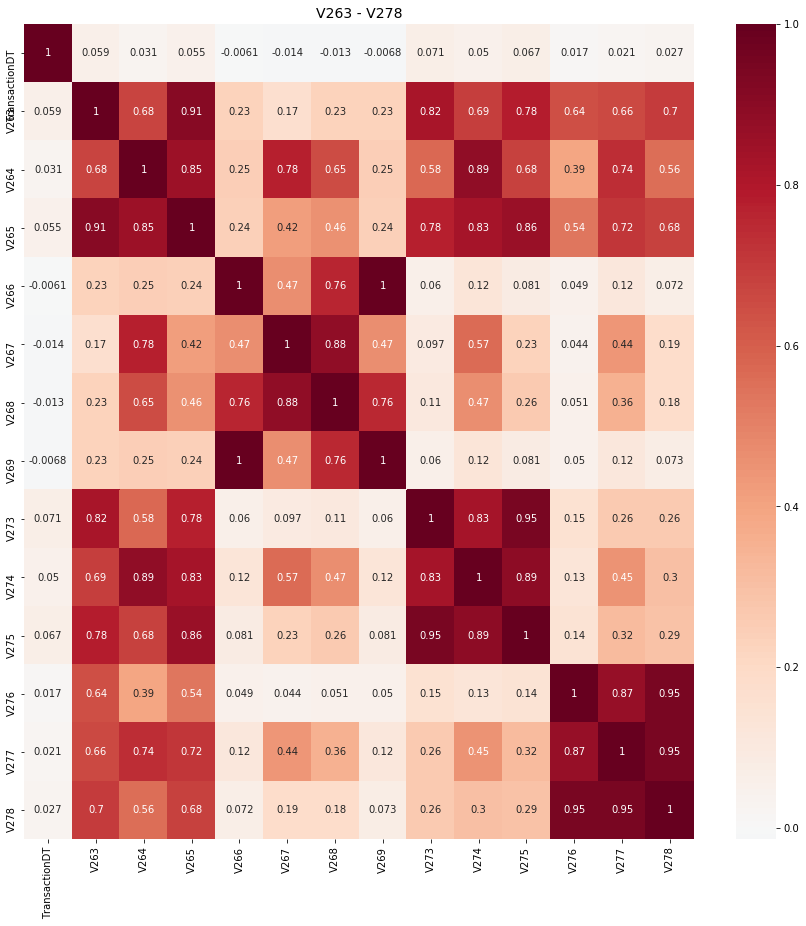

In [108]:
Vs = [x for x in nans_groups[460110] if (int(x[1:])>262)]
make_plots(Vs)
make_corr(Vs)

In [109]:
grps = [[263,265,264],[266,269],[267,268],[273,274,275],[276,277,278]]
reduce_group(grps)

Use these [264, 266, 267, 274, 277]


# V220 ~ V272

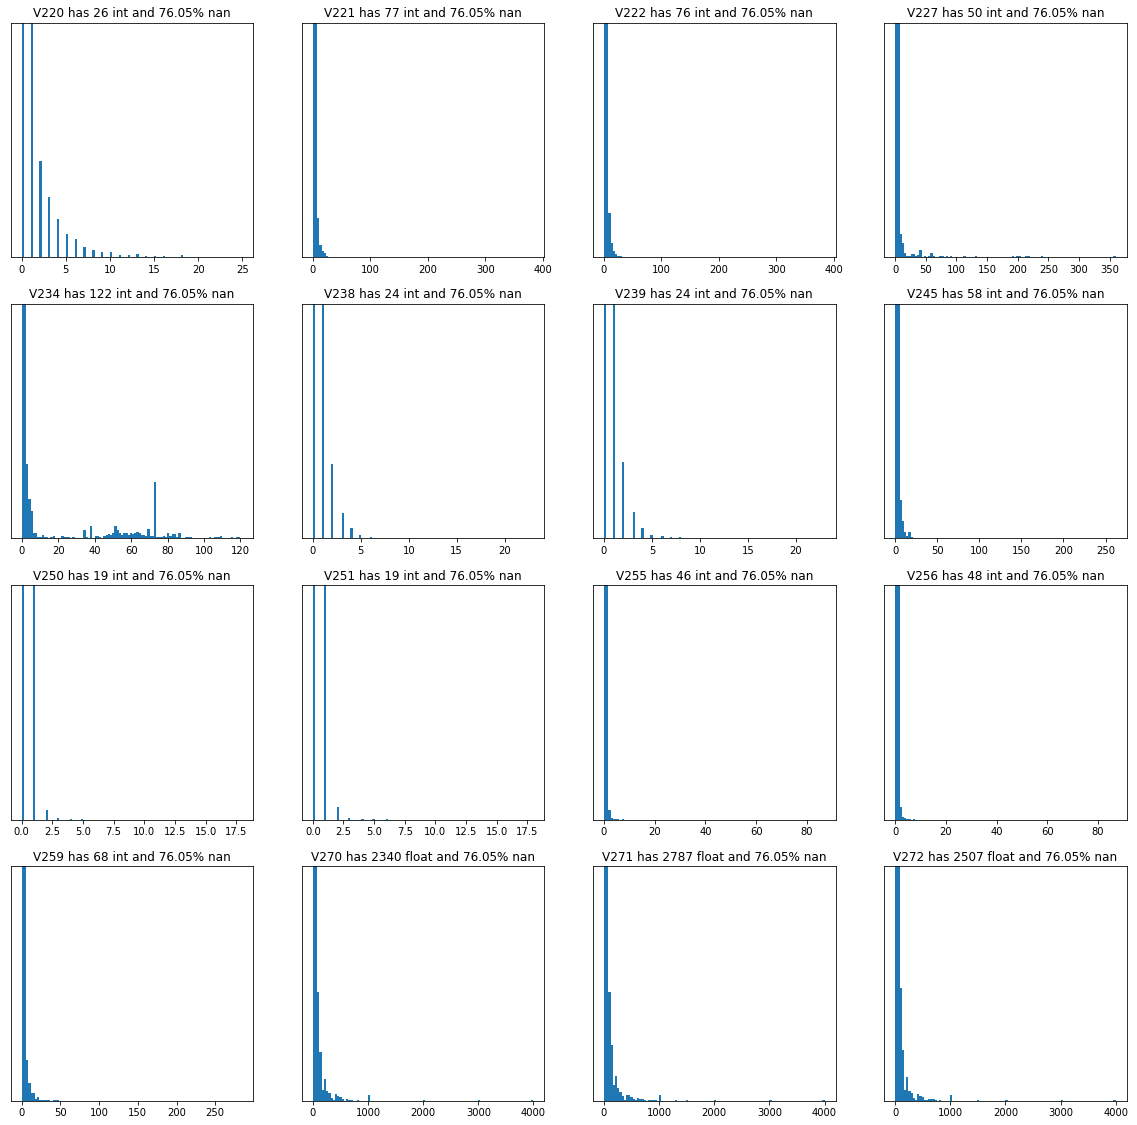

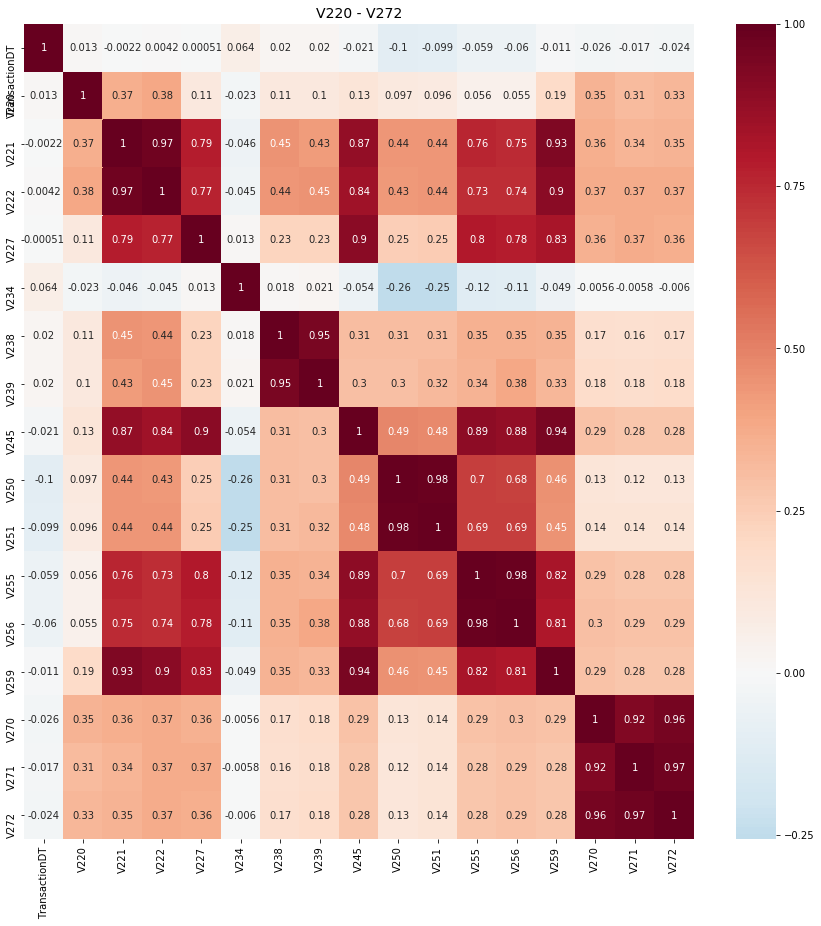

In [110]:
Vs = nans_groups[449124]
make_plots(Vs)
make_corr(Vs)

In [111]:
grps = [[220],[221,222,227,245,255,256,259],[234],[238,239],[250,251],[270,271,272]]
reduce_group(grps)

Use these [220, 221, 234, 238, 250, 271]


# V279 ~ V321

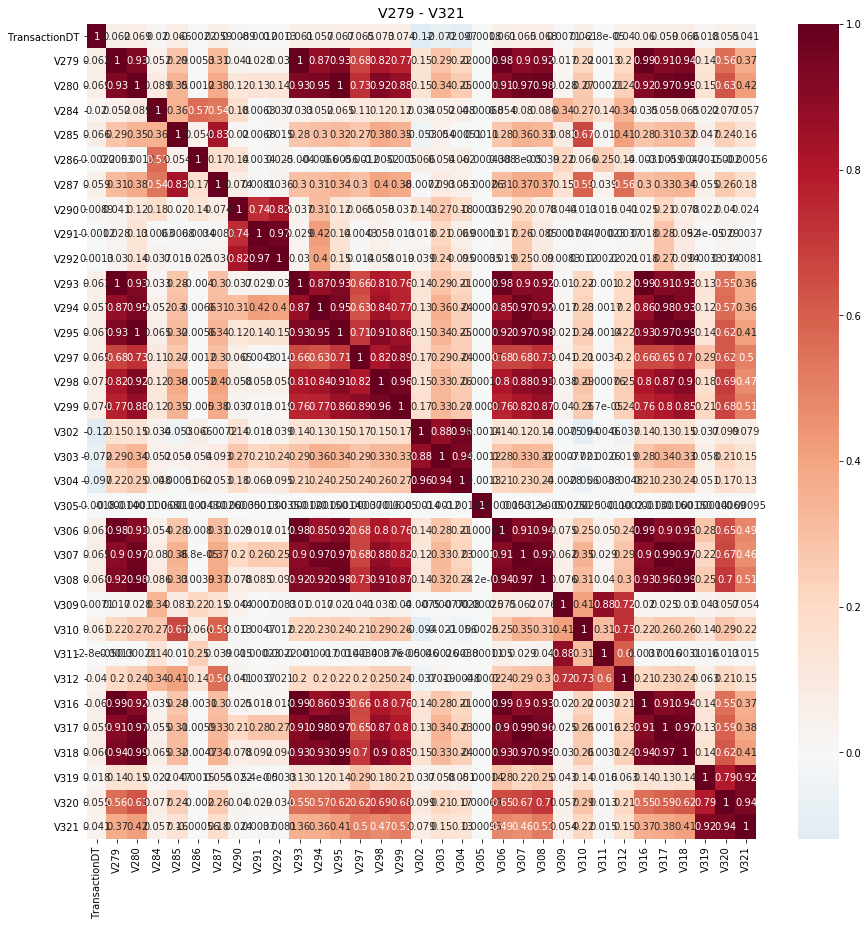

In [112]:
Vs = [x for x in nans_groups[12]]
make_corr(Vs)

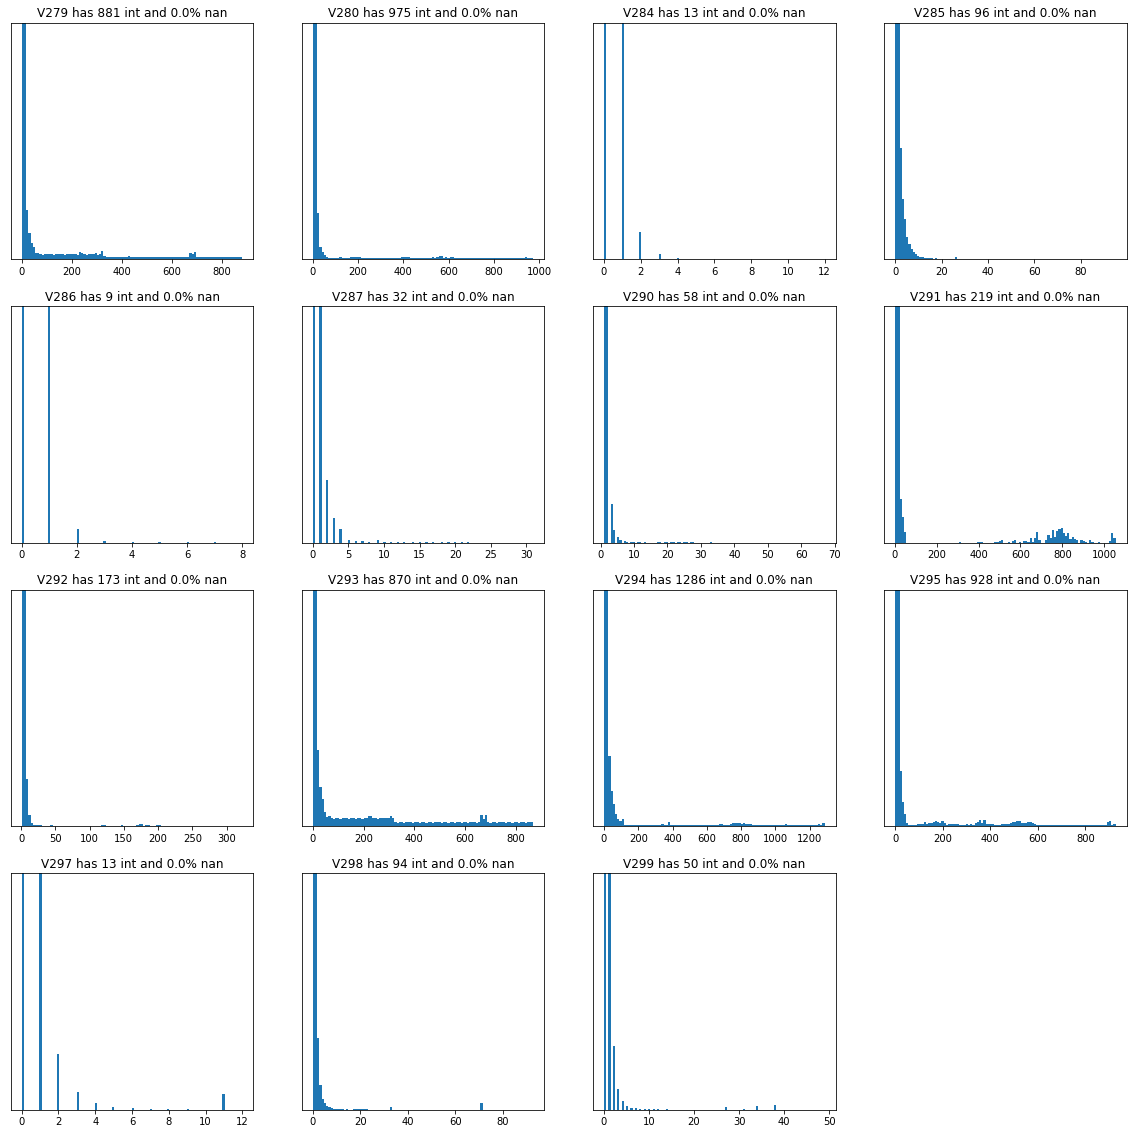

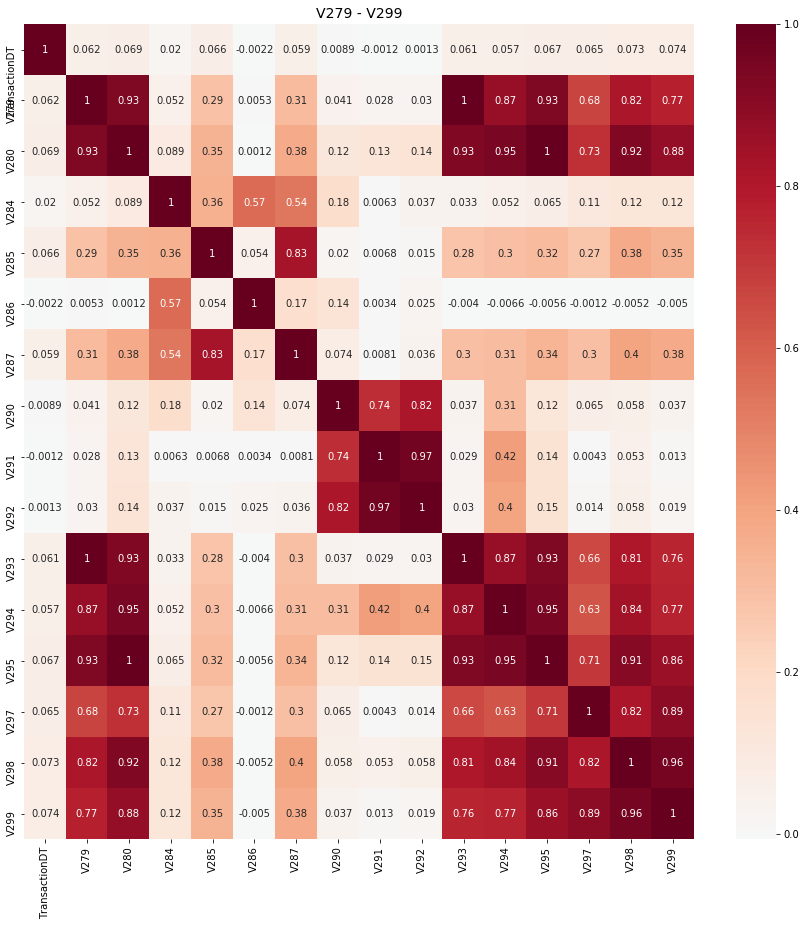

In [113]:
Vs = [x for x in nans_groups[12] if int(x[1:])<302]
make_plots(Vs)
make_corr(Vs)

In [114]:
grps = [[279,280,293,294,295,298,299],[284],[285,287],[286],[290,291,292],[297]]
reduce_group(grps)

Use these [294, 284, 285, 286, 291, 297]


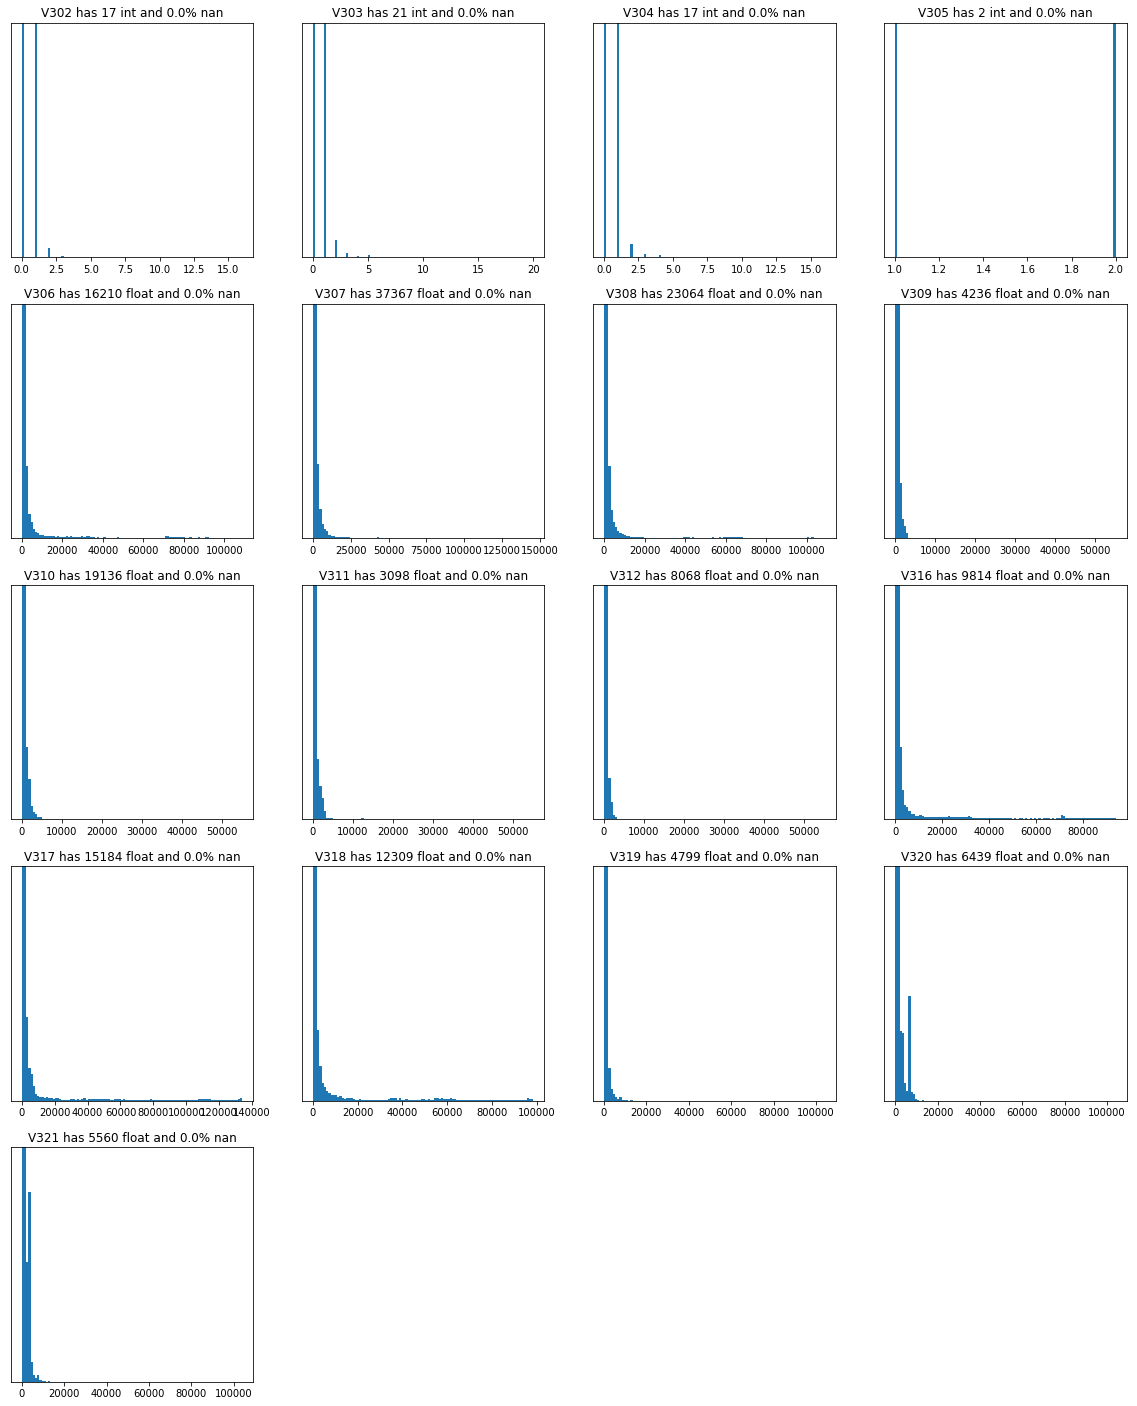

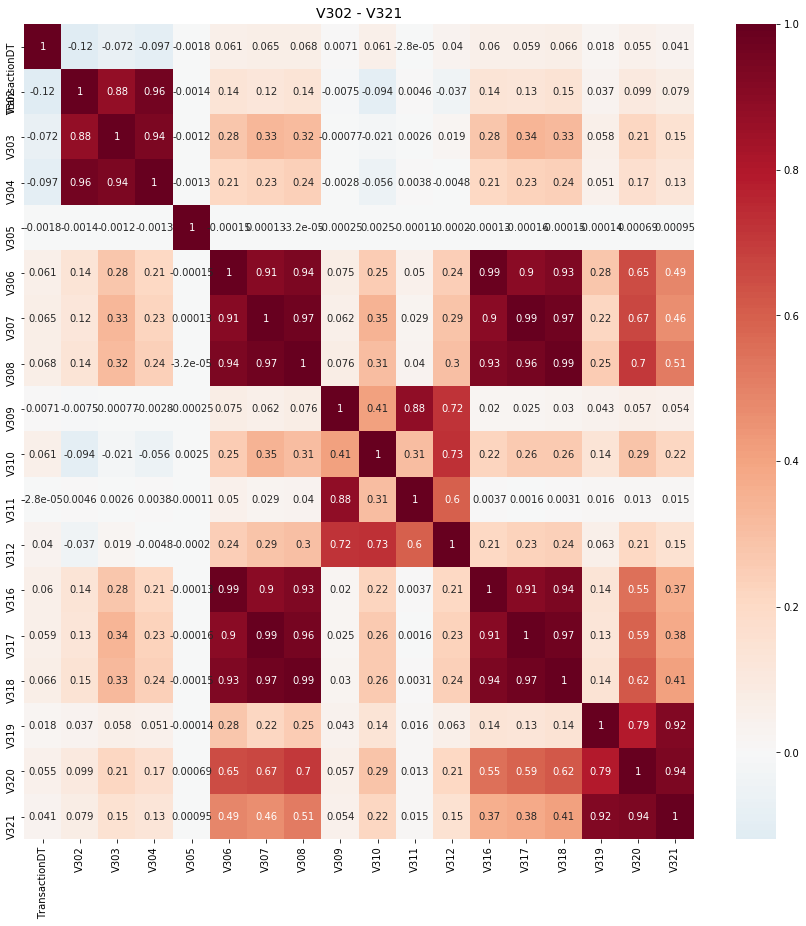

In [115]:
Vs = [x for x in nans_groups[12] if int(x[1:])>299]
make_plots(Vs)
make_corr(Vs)

In [116]:
grps = [[302,303,304],[305],[306,307,308,316,317,318],[309,311],[310,312],[319,320,321]]
reduce_group(grps)

Use these [303, 305, 307, 309, 310, 320]


# V281 ~ V315, D1

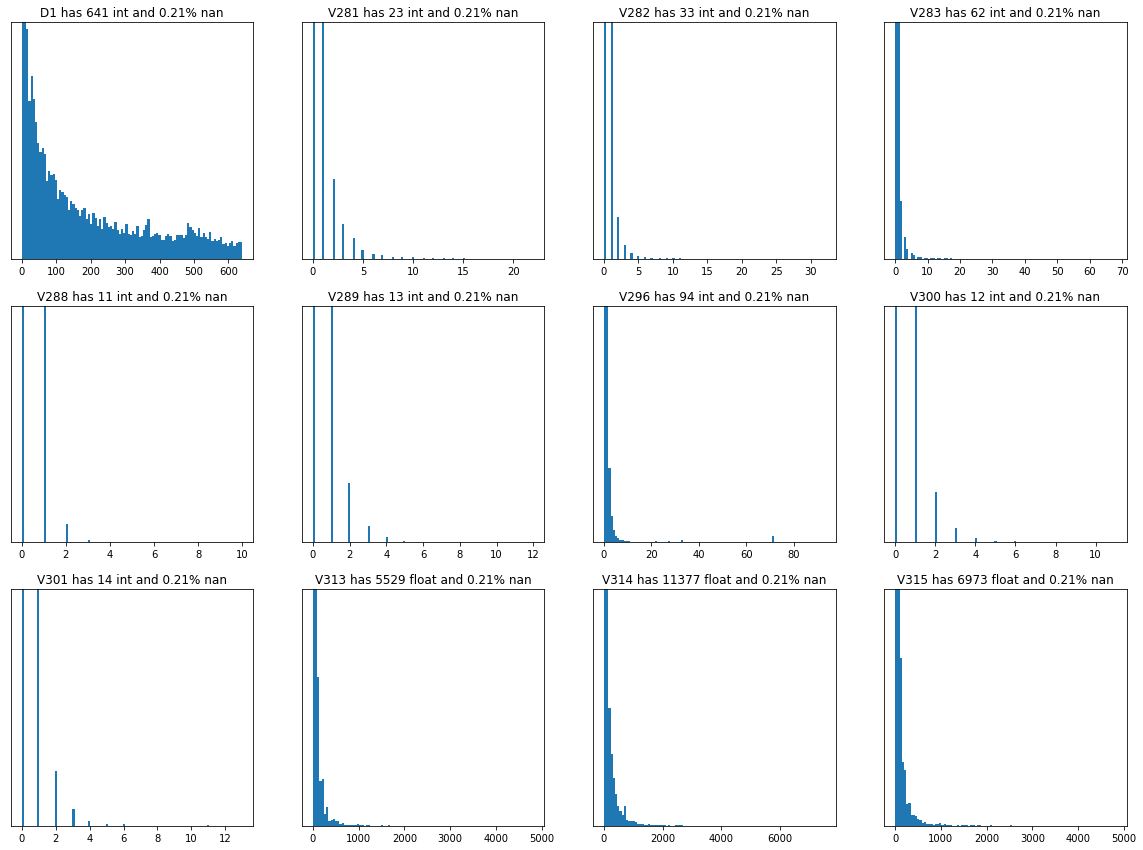

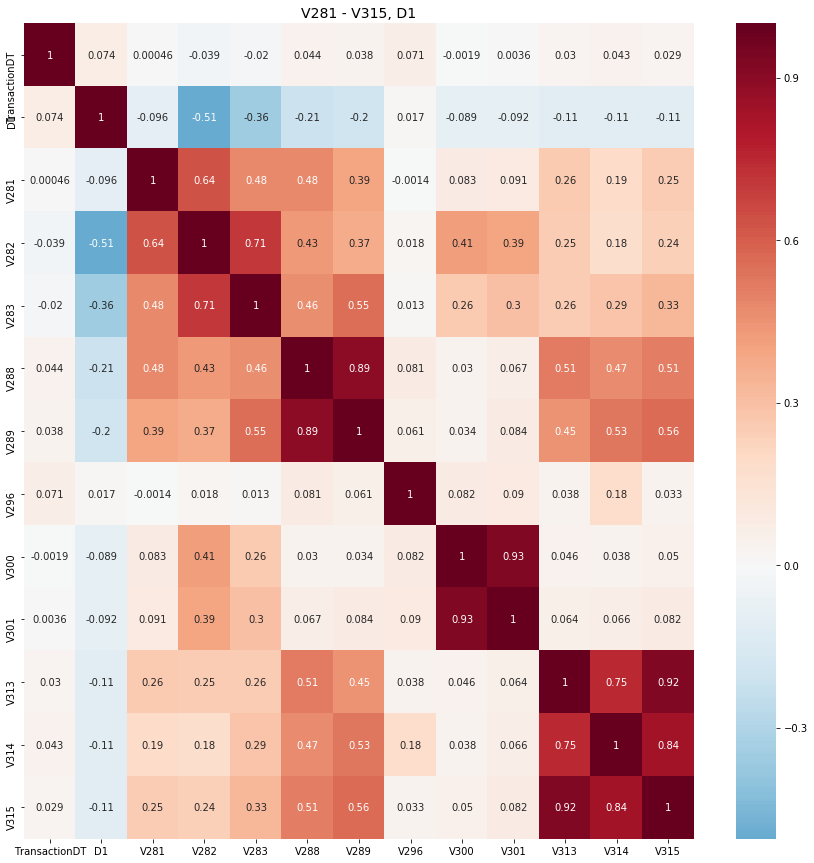

In [117]:
Vs = nans_groups[1269]
make_plots(Vs)
Vtitle = 'V281 - V315, D1'
make_corr(Vs,Vtitle)

In [118]:
grps = [[281],[282,283],[288,289],[296],[300,301],[313,314,315]]
reduce_group(grps)

Use these [281, 283, 289, 296, 301, 314]


# V322 - V339

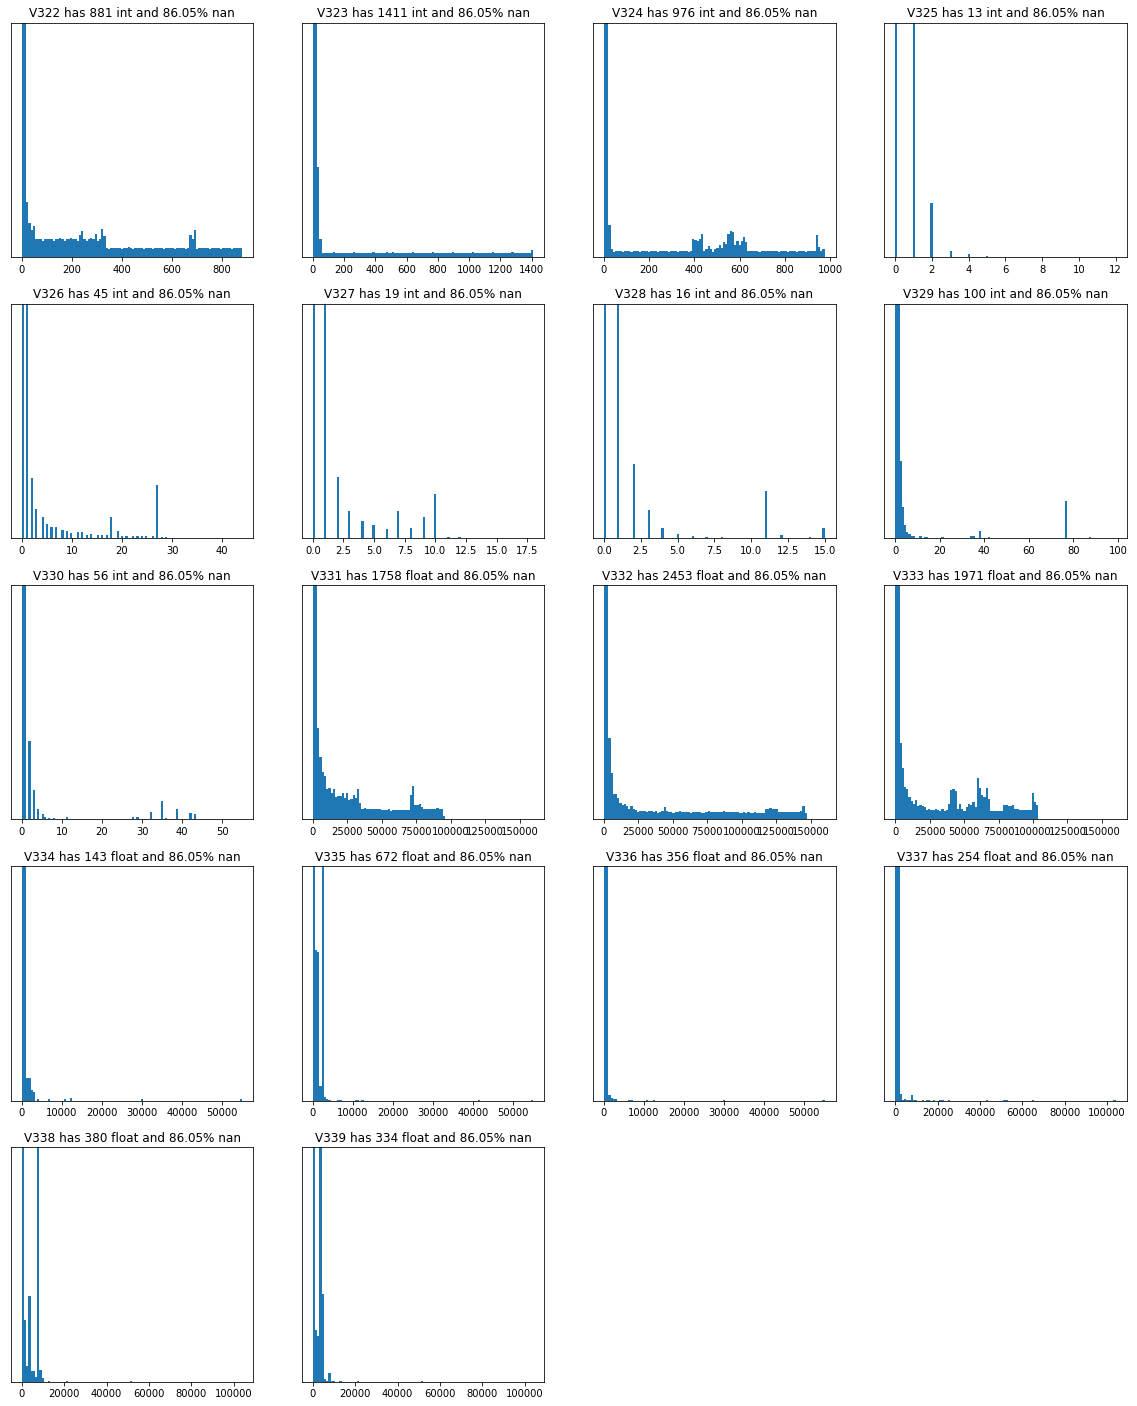

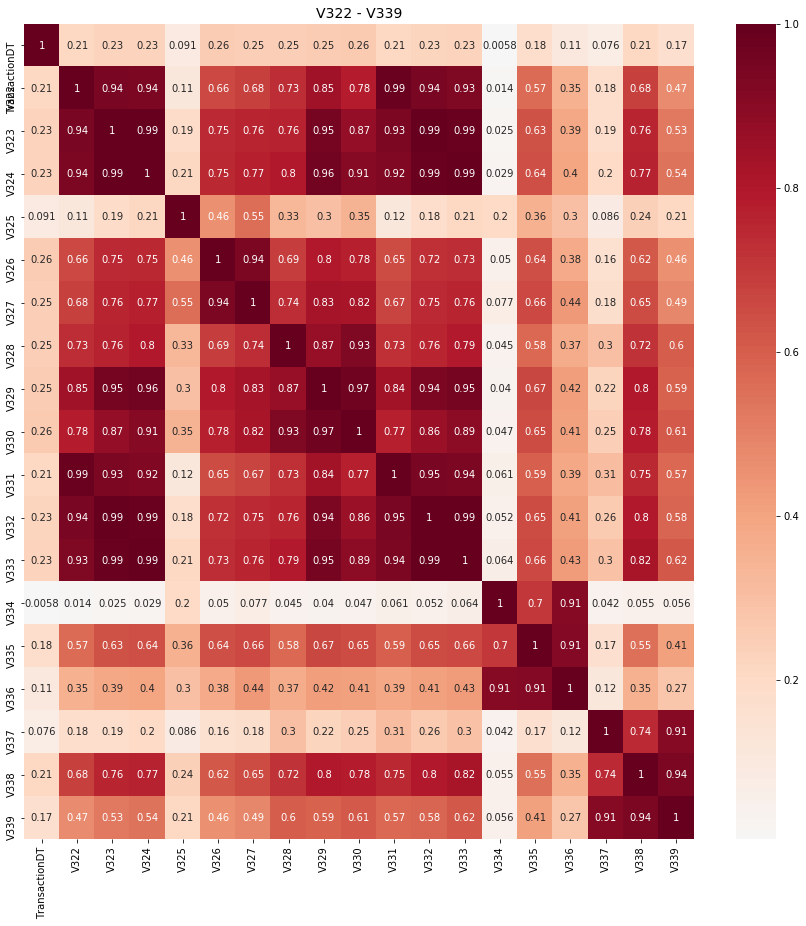

In [119]:
Vs = nans_groups[508189]
make_plots(Vs)
make_corr(Vs)

In [120]:
grps = [[322,323,324,326,327,328,329,330,331,332,333],[325],[334,335,336],[337,338,339]]
reduce_group(grps)

Use these [332, 325, 335, 338]


# V Reduced
Wow, even this reduced set still has much internal correlation. These V columns are highly redundant!

In [129]:
v =  [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]
v += [96, 98, 99, 104]
v += [107, 108, 111, 115, 117, 120, 121, 123]
v += [124, 127, 129, 130, 136]
v += [138, 139, 142, 147, 156, 162]
v += [165, 160, 166]
v += [178, 176, 173, 182]
v += [187, 203, 205, 207, 215]
v += [169, 171, 175, 180, 185, 188, 198, 210, 209]
v += [218, 223, 224, 226, 228, 229, 235]
v += [240, 258, 257, 253, 252, 260, 261]
v += [264, 266, 267, 274, 277]
v += [220, 221, 234, 238, 250, 271]
v += [294, 284, 285, 286, 291, 297]
v += [303, 305, 307, 309, 310, 320]
v += [281, 283, 289, 296, 301, 314]
v += [332, 325, 335, 338]

In [ ]:
col_red = ['V'+str(x) for x in range(1,340)]
col_org = train.

In [130]:
print('Reduced set has',len(v),'columns')

Reduced set has 128 columns


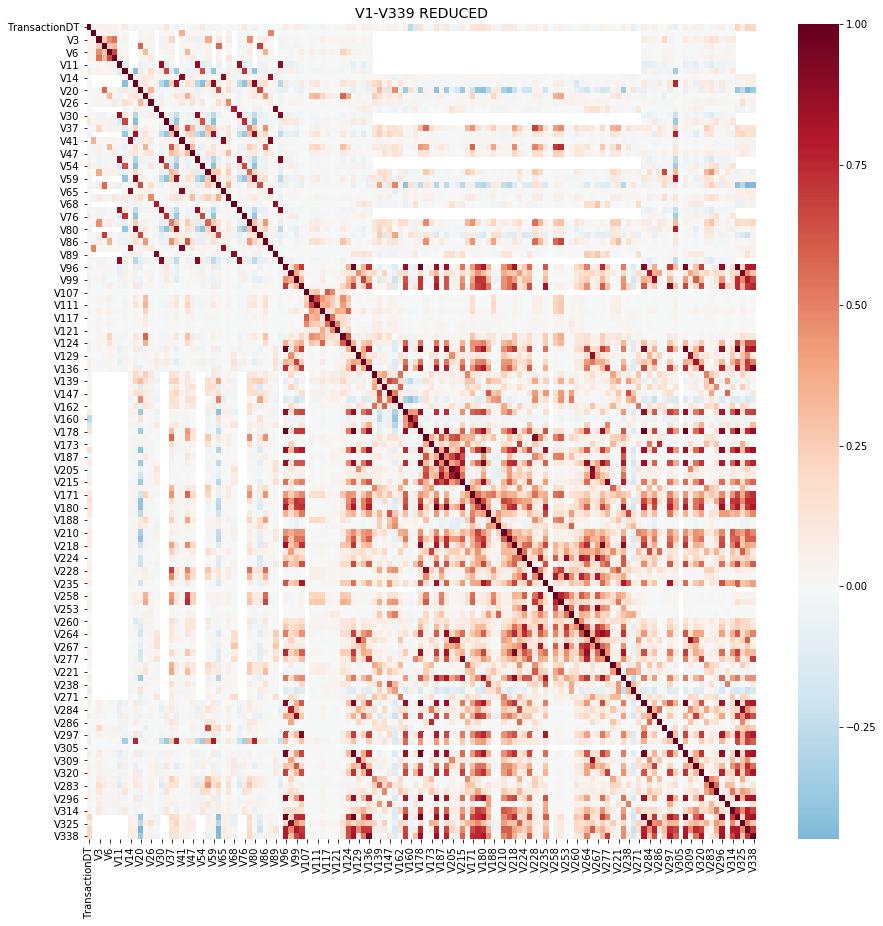

In [131]:
cols = ['TransactionDT'] + ['V'+str(x) for x in v]
train2 = train[cols].sample(frac=0.2)
plt.figure(figsize=(15,15))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 REDUCED',fontsize=14)
plt.show()

# V All
We notice that the first 100 Vs don't correlate much with the last 239 Vs. Also even though the first 100 have 6 different NAN groups there is much correlation between the groups. The latter 239 relate to each other.

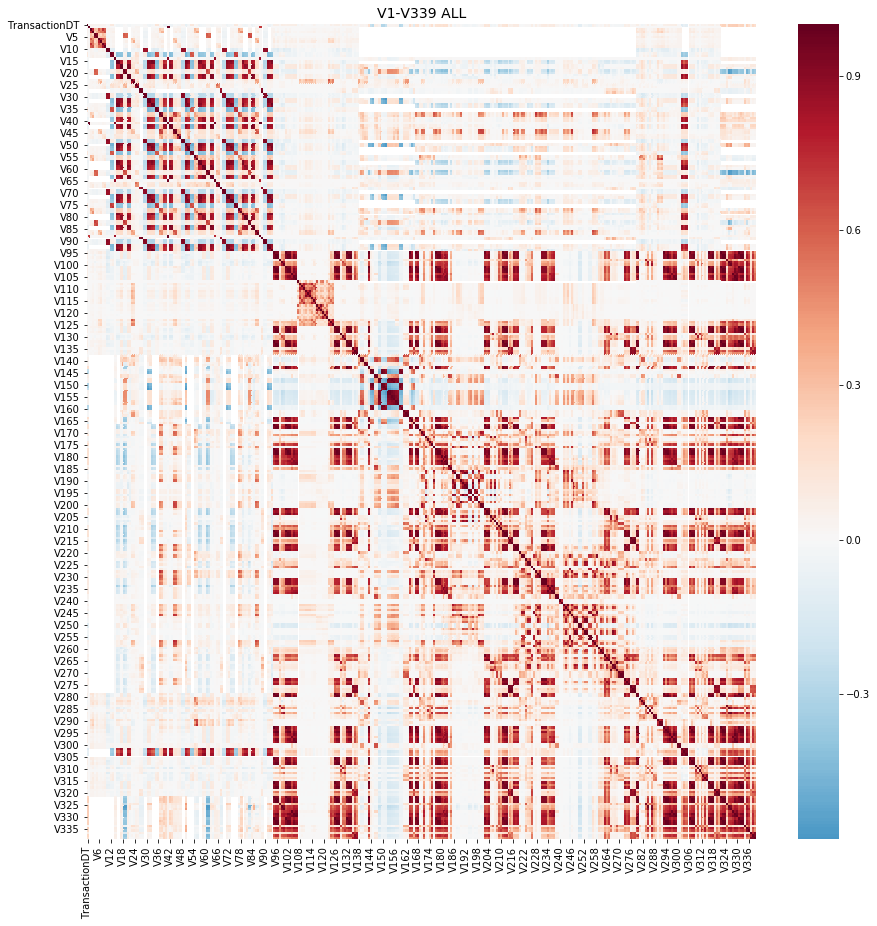

In [124]:
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
train2 = train[cols].sample(frac=0.2)
plt.figure(figsize=(15,15))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

In [132]:
print(len(v))
import pickle

with open('mycols.pkl', 'wb') as f:
    pickle.dump(cols, f)
# with open('mycols.pkl', 'rb') as f:
#     mynewcol = pickle.load(f)

128


# C Columns

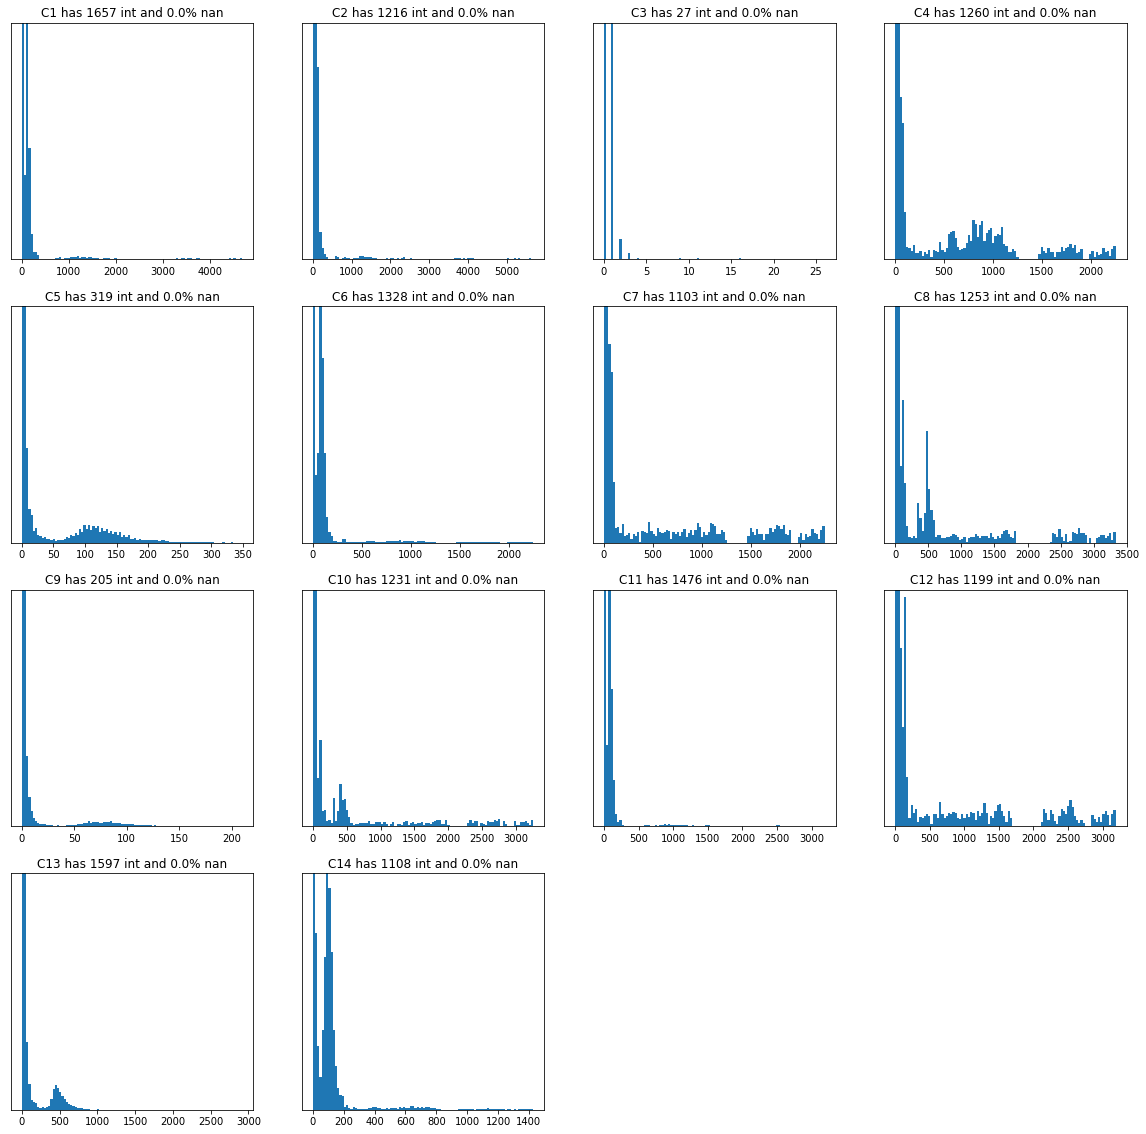

In [57]:
def make_plots2(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        idx = train[~train[v].isna()].index
        n = train[v].nunique()
        x = np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train[v].isna())/len(train),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots2(['C'+str(x) for x in range(1,15)])

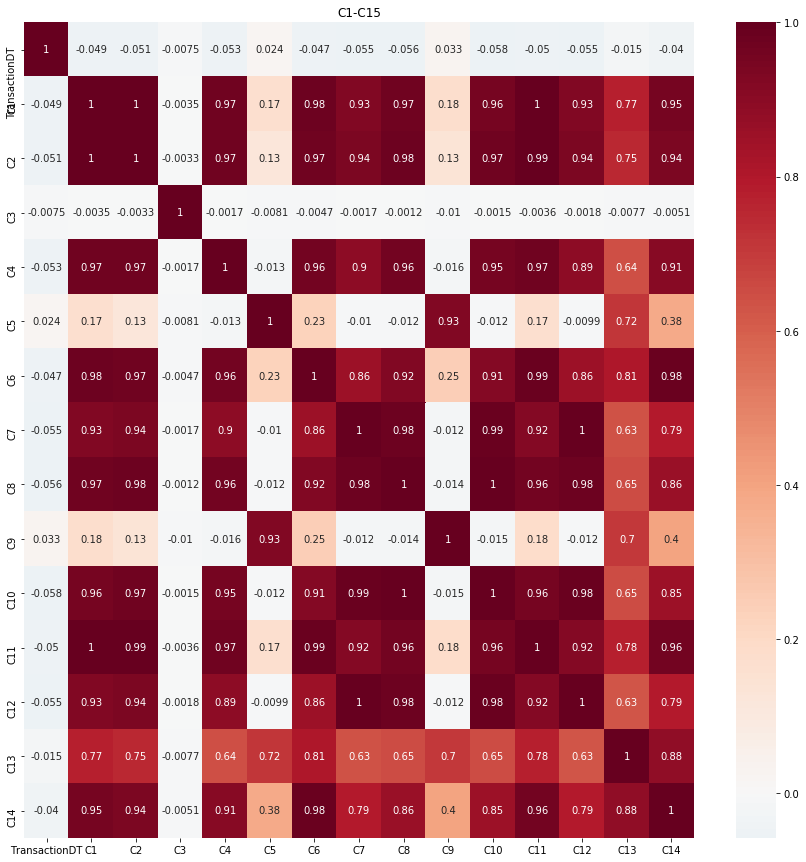

In [58]:
cols = ['TransactionDT'] + ['C'+str(x) for x in range(1,15)]
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('C1-C15')
plt.show()

# D Columns

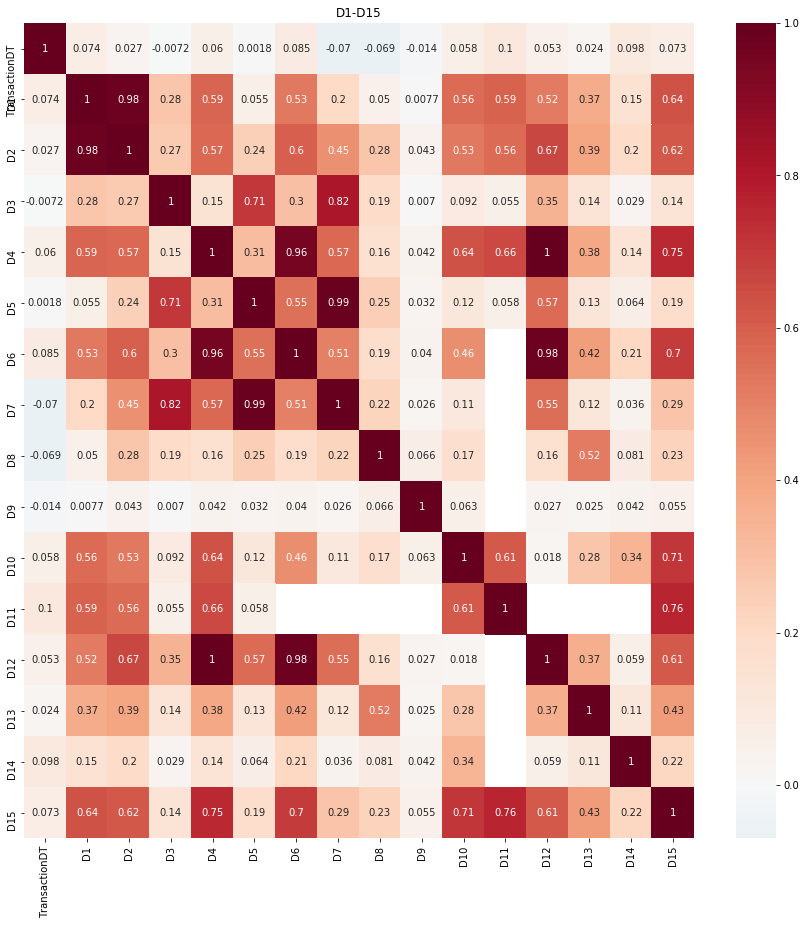

In [59]:
cols = ['TransactionDT'] + ['D'+str(x) for x in range(1,16)]
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('D1-D15')
plt.show()

# M Columns

In [60]:
Ms = ['M'+str(x) for x in range(1,10)]
mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in Ms: train[c] = train[c].map(mp)

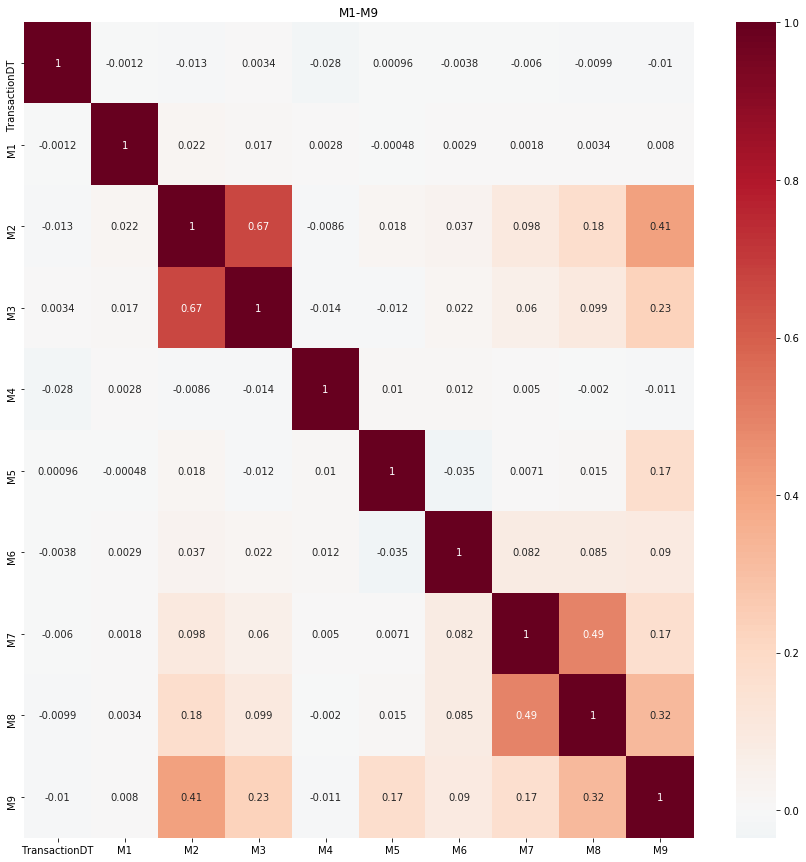

In [61]:
cols = ['TransactionDT'] + Ms
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('M1-M9')
plt.show()

# ID Columns

In [63]:
train_id = pd.read_csv('train_identity.csv')
train_id = pd.merge(train_id,train[['TransactionID','TransactionDT']],on='TransactionID',how='left')
ids = ['id_0'+str(x) for x in range(1,10)]+['id_'+str(x) for x in range(10,39)]
for c in ids: print (c,train_id[c].unique()[:10])

id_01 [  0.  -5. -15. -10. -20. -40. -30. -25. -55. -45.]
id_02 [ 70787.  98945. 191631. 221832.   7460.  61141.     nan  31964. 116098.
 257037.]
id_03 [nan  0.  3.  2.  5.  1.  6.  9.  4. -5.]
id_04 [ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.]
id_05 [nan  0.  1.  3.  2.  9. 12.  6.  4. 21.]
id_06 [ nan  -5.   0.  -6. -10. -11.  -1.  -4. -43.  -9.]
id_07 [nan 22.  6. -1.  4.  2. 17. 12. 27.  5.]
id_08 [  nan  -34.  -55. -100.  -15.  -33.  -13.  -36.  -44.  -26.]
id_09 [nan  0.  3.  2.  1.  5. -8.  7.  4.  6.]
id_10 [ nan   0.  -9. -42.  -6. -29.  -8.  -1.  -5. -11.]
id_11 [100.                  nan  93.75        95.08000183  95.65000153
  94.29000092  96.19000244  90.56999969  97.54000092  96.43000031]
id_12 ['NotFound' 'Found']
id_13 [nan 49. 52. 14. 20. 55. 43. 18. 41. 63.]
id_14 [-480. -300.   nan -360. -420. -540. -600.  480. -240.  300.]
id_15 ['New' 'Found' nan 'Unknown']
id_16 ['NotFound' 'Found' nan]
id_17 [166. 121. 225.  nan 102. 148. 199. 146. 144. 133.]
id_18 [nan 1

In [64]:
booln = ['id_12','id_15','id_16','id_27','id_28','id_29','id_35','id_36','id_37','id_38']
cats = ['id_23','id_30','id_31','id_33','id_34']
mp = {'Unknown':0,'NotFound':1,'Found':2,'New':3,'F':0,'T':1}
for c in booln: train_id[c] = train_id[c].map(mp)

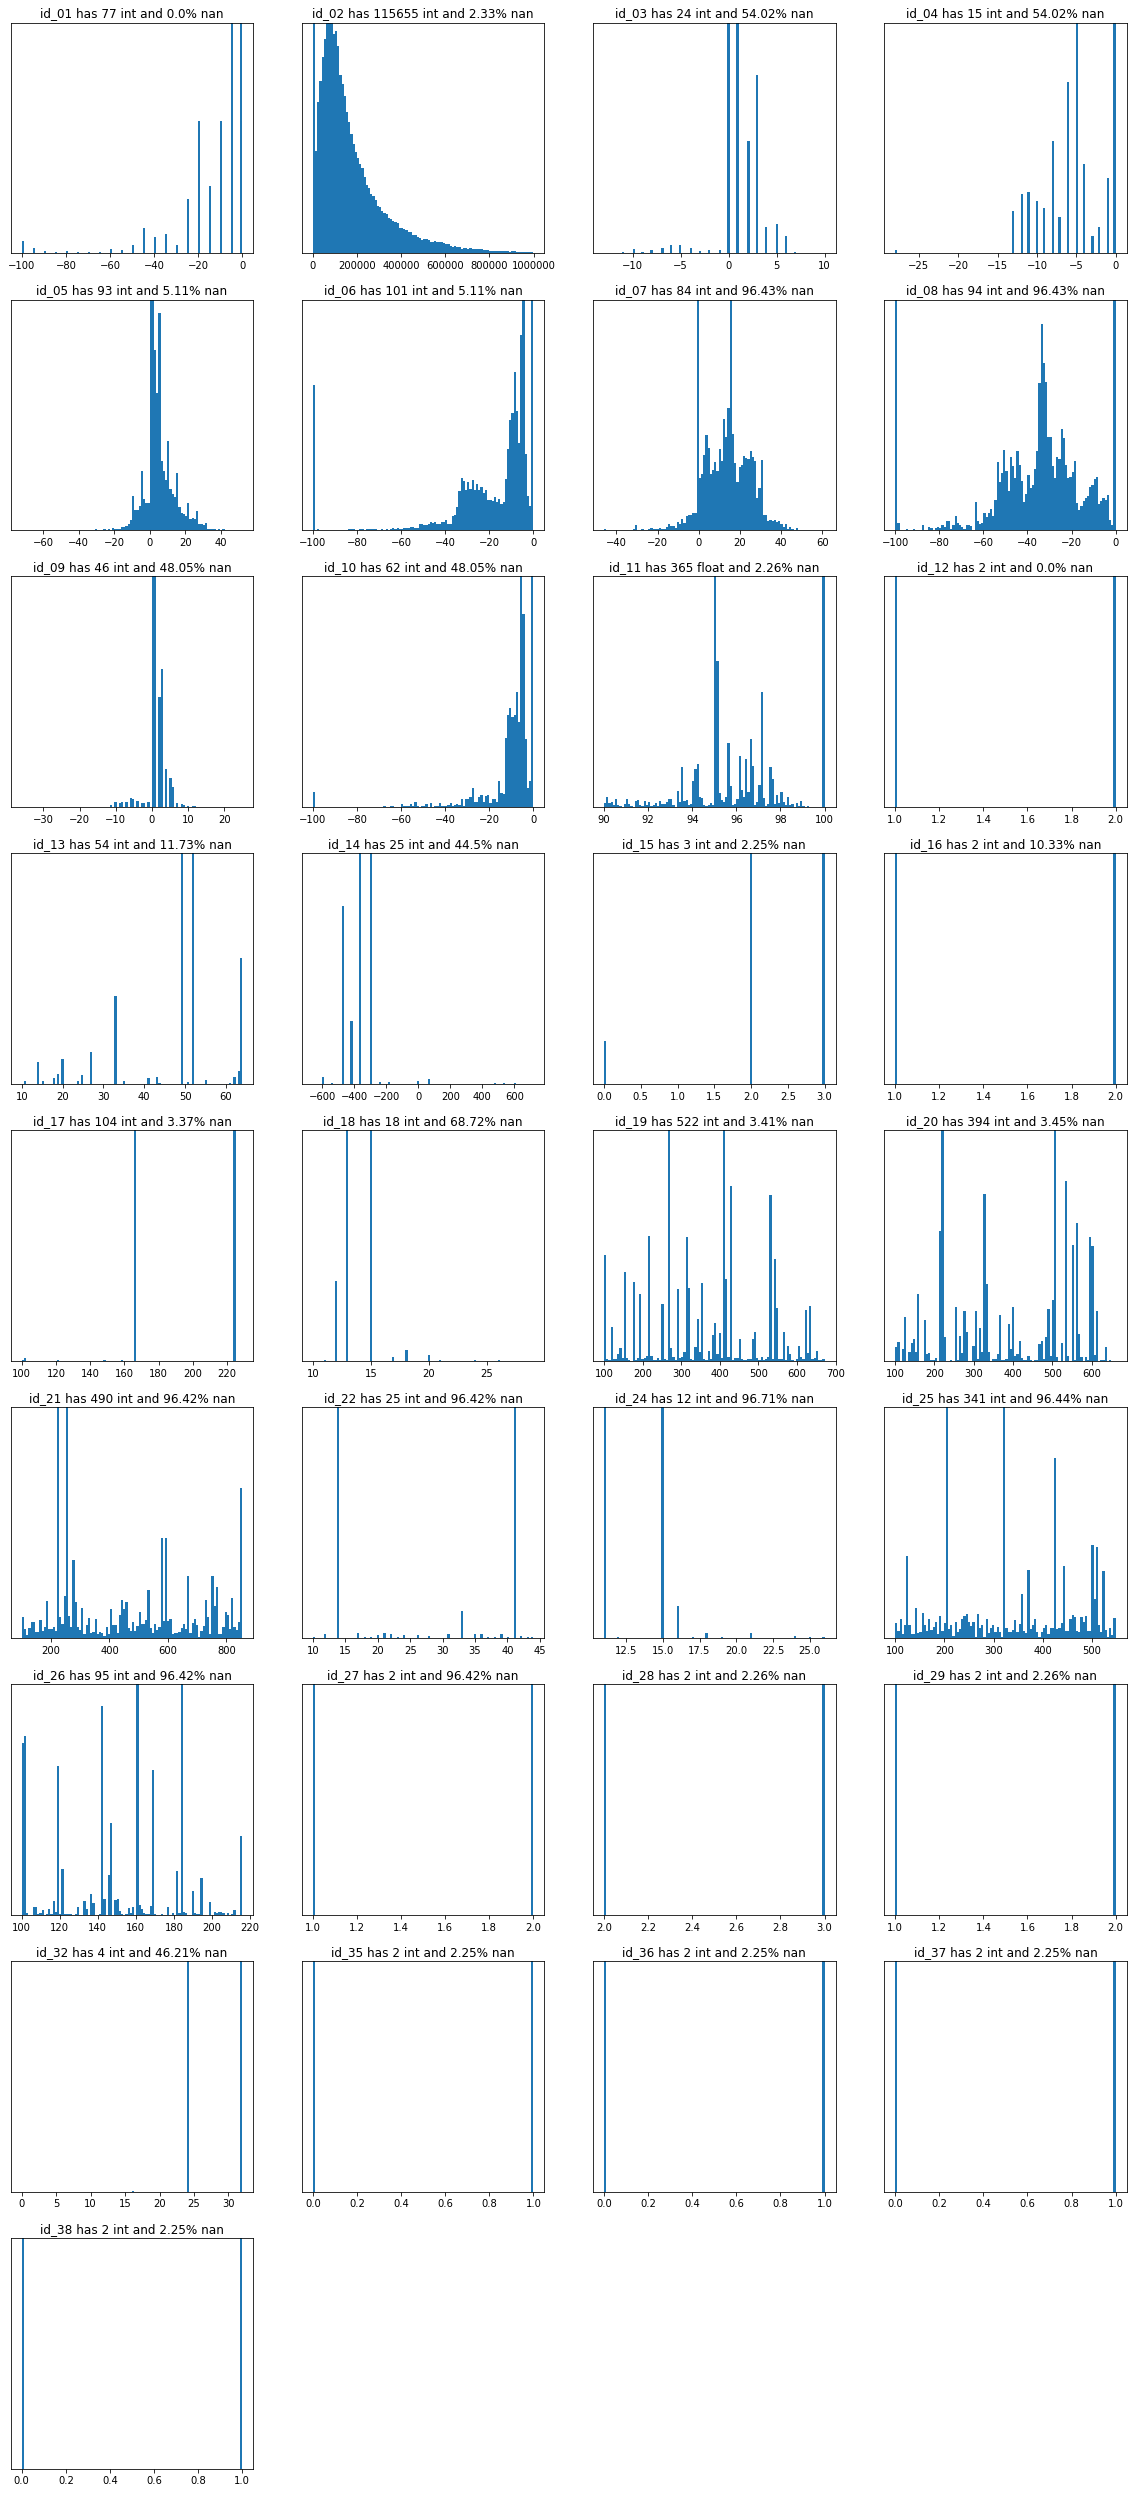

In [65]:
def make_plots2(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        idx = train_id[~train_id[v].isna()].index
        n = train_id[v].nunique()
        x = np.sum(train_id.loc[idx,v]!=train_id.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train_id[v].isna())/len(train_id),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train_id.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots2([x for x in ids if x not in cats])

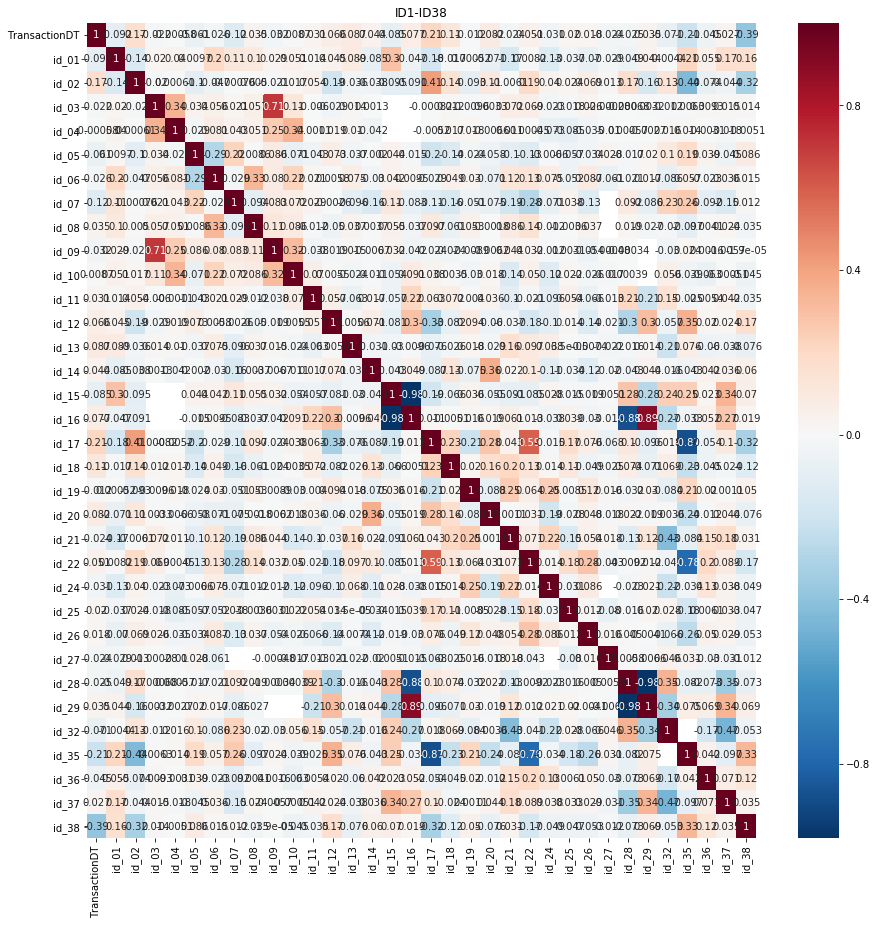

In [66]:
cols = ['TransactionDT'] + [x for x in ids if x not in cats]
plt.figure(figsize=(15,15))
sns.heatmap(train_id[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('ID1-ID38')
plt.show()

In [67]:
import pickle

with open('mycols.pkl', 'wb') as f:
    pickle.dump(cols, f)
with open('mycols.pkl', 'rb') as f:
    mynewcol = pickle.load(f)

In [69]:
mynewcol

['TransactionDT',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_32',
 'id_35',
 'id_36',
 'id_37',
 'id_38']